# Credit Card Users Churn Prediction_Project_GAP

By: Glen A Patterson

Date: 11-26-2022

## Problem Statment:

Help Thera bank come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards.

## Objective:

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

## Data Dictionary:

1. **CLIENTNUM:** Client number. Unique identifier for the customer holding the account
2. **Attrition_Flag:** Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
3. **Customer_Age:** Age in Years
4. **Gender:** Gender of the account holder
5. **Dependent_count:** Number of dependents
6. **Education_Level:**  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
7. **Marital_Status:** Marital Status of the account holder
8. **Income_Category:** Annual Income Category of the account holder
9. **Card_Category:** Type of Card
10. **Months_on_book:** Period of relationship with the bank
11. **Total_Relationship_Count:** Total no. of products held by the customer
12. **Months_Inactive_12_mon:** No. of months inactive in the last 12 months
13. **Contacts_Count_12_mon:** No. of Contacts between the customer and bank in the last 12 months
14. **Credit_Limit:** Credit Limit on the Credit Card
15. **Total_Revolving_Bal:** The balance that carries over from one month to the next is the revolving balance
16. **Avg_Open_To_Buy:** Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
17. **Total_Trans_Amt:** Total Transaction Amount (Last 12 months)
18. **Total_Trans_Ct:** Total Transaction Count (Last 12 months)
19. **Total_Ct_Chng_Q4_Q1:** Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
20. **Total_Amt_Chng_Q4_Q1:** Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
21. **Avg_Utilization_Ratio:** Represents how much of the available credit the customer spent

## Importing the necessary libraries:

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help read, save, and manipulate data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

sns.set()

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 300)

# To split the data into train and test
from sklearn.model_selection import train_test_split

# To build the Logistic regression_model
from sklearn.linear_model import LogisticRegression

# To check model performance
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# To build and visualize the Decision Tree_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To impute missing values
from sklearn.impute import SimpleImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Hyperparameter Tuning of the Decision Tree to build a better model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To build the Bagging and RandomForest models
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# To build the boosting models AdaBoost, GradientBoosting, and Stacking
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# To build the XGBoost model
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

In [2]:
# Load the csv file and call the dataframe "BankChurners"
BankChurners = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [3]:
# Make a copy of original dataframe "BankChurners" and call it "data".  We will be modifying this dataframe
data = BankChurners.copy()

<IPython.core.display.Javascript object>

In [4]:
# Observing a sample of 10 random rows of the dataset to make sure it loaded correctly and examine the data.
data.sample(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
2980  711443808  Existing Customer            46      M                2   
8618  778894233  Existing Customer            42      M                5   
2393  813213558  Existing Customer            53      F                1   
3766  804415083  Attrited Customer            45      M                3   
1633  720668358  Existing Customer            59      M                0   
1502  789282333  Existing Customer            62      F                0   
4342  778878633  Existing Customer            51      M                3   
8066  788782008  Existing Customer            49      F                3   
1277  709816158  Existing Customer            31      F                1   
7126  788835408  Attrited Customer            49      F                3   

     Education_Level Marital_Status Income_Category Card_Category  \
2980             NaN       Divorced     $60K - $80K          Blue   
8618     High School            NaN    $80K - $120K          Blue   
2393       Doctorate         Single  Less than $40K          Blue   
3766             NaN        Married     $60K - $80K          Blue   
1633      Uneducated         Single     $40K - $60K          Blue   
1502        Graduate        Married             abc          Blue   
4342             NaN        Married    $80K - $120K          Blue   
8066             NaN        Married  Less than $40K          Gold   
1277             NaN         Single             abc        Silver   
7126             NaN        Married  Less than $40K          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
2980              37                         6                       1   
8618              23                         3                       2   
2393              48                         4                       3   
3766              40                         3                       5   
1633              46                         3                       3   
1502              51                         3                       3   
4342              32                         6                       3   
8066              30                         4                       3   
1277              36                         4                       3   
7126              33                         6                       3   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
2980                      1        2695.0                 1657   
8618                      3        7253.0                    0   
2393                      3        2267.0                 1469   
3766                      3        4097.0                  655   
1633                      3        1648.0                  997   
1502                      3       10826.0                 1274   
4342                      1        1817.0                  885   
8066                      2       15987.0                    0   
1277                      2       34516.0                    0   
7126                      3        2910.0                    0   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
2980           1038.0                 0.813             4068              53   
8618           7253.0                 0.644             7595              83   
2393            798.0                 0.716             3709              64   
3766           3442.0                 1.084             2611              51   
1633            651.0                 0.776             1776              36   
1502           9552.0                 0.602             1355              34   
4342            932.0                 0.621             3400              67   
8066          15987.0                 0.658             4146              69   
1277          34516.0                 0.791             2183              60   
7126           2910.0                 0.789             2648       

<IPython.core.display.Javascript object>

- We need to impute missing value for Income_Category "abc"
- We need to convert Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category from "object" to "category"
- We need to drop CLIENTNUM for modeling

In [5]:
# Get information about the number of rows and columns in the dataset (rows, columns)
data.shape

(10127, 21)

<IPython.core.display.Javascript object>

- We can see that there is 10,127 rows and 21 columns

In [6]:
# See if there is any duplicated rows
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There is no duplicated rows in dataset.

In [7]:
# Information on dataset (data types, format, missing data, ect.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

- There is missing data in columns Education_Level, Marital_Status, and Income_Category as "abc"
- There is 1.6+ MB memory used
- There is five "float64", ten "int64", and six "object" data types

In [8]:
# Find the number of different Attrition_Flag in this dataset
data["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

<IPython.core.display.Javascript object>

- There is an imbalance between Existing and Attrited Customers
- Attrition_Flag needs to be encoded: Attrited - 1  Existing - 0

In [9]:
# Find the number of different Gender in this dataset
data["Gender"].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

- This Column should be data type "category"
- There is 2 different Gender in this dataset

In [10]:
# Find the number of different Education_Level in this dataset
data["Education_Level"].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

<IPython.core.display.Javascript object>

- This Column should be data type "category"
- There is 6 different Education_Level in this dataset

In [11]:
# Find the number of different Marital_Status in this dataset
data["Marital_Status"].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

<IPython.core.display.Javascript object>

- This Column should be data type "category"
- There is 3 different Marital_Status in this dataset

In [12]:
# Find the number of different Income_Category in this dataset
data["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

- This Column should be data type "category"
- There is 5 different Income_Category in this dataset
- There is 1,112 unknown Income called "abc"

In [13]:
# Find the number of different Card_Category in this dataset
data["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

<IPython.core.display.Javascript object>

- This Column should be data type "category"
- There is 4 different Card_Category in this dataset
- Blue Card_Category is the most common card type

In [14]:
# replace missing data "abc" with NaN
data["Income_Category"].replace("abc", np.NaN, inplace=True)

<IPython.core.display.Javascript object>

In [15]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

<IPython.core.display.Javascript object>

In [16]:
# fill missing values with mode column values for Education_Level, Marital_Status, Income_Category
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# Fit and transform the dataset
data[reqd_col_for_impute] = imputer.fit_transform(data[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [17]:
# Convert Gender, Education_Level, Marital_Status, Income_Category, and Card_Category to data type "category"
data["Gender"] = data["Gender"].astype("category")
data["Education_Level"] = data["Education_Level"].astype("category")
data["Marital_Status"] = data["Marital_Status"].astype("category")
data["Income_Category"] = data["Income_Category"].astype("category")
data["Card_Category"] = data["Card_Category"].astype("category")

<IPython.core.display.Javascript object>

In [18]:
# replace Attrited customers with 1 and Existing customers with 0
data["Attrition_Flag"] = data["Attrition_Flag"].apply(
    lambda x: 1 if x == "Attrited Customer" else 0
)

<IPython.core.display.Javascript object>

In [19]:
# Checking new information on dataset for missing values and type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  int64   
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

<IPython.core.display.Javascript object>

- There is no missing data in this dataset now
- There is 1.2 MB memory used
- There is five "category", five "float64", eleven "int64" data types

In [20]:
# Drop CLIENTNUM from the dataset as it will not be needed for modeling
data = data.drop(columns="CLIENTNUM")

<IPython.core.display.Javascript object>

In [21]:
# Explore the Statistics in data and look for outliers in dataset
data.describe().T

count         mean          std     min       25%  \
Attrition_Flag            10127.0     0.160660     0.367235     0.0     0.000   
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Attrition_Flag               0.000      0.000      1.000  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate analysis:

In [22]:
# function to create labeled barplots
def labeled_barplot(data, feature, figuresize=3, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, figuresize * 6))
    else:
        plt.figure(figsize=(n + 2, figuresize * 6))

    plt.xticks(rotation=90, fontsize=figuresize * 16)
    plt.yticks(fontsize=figuresize * 16)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=25,
            xytext=(0, 10),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# This is a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Observation on Attrition_Flag

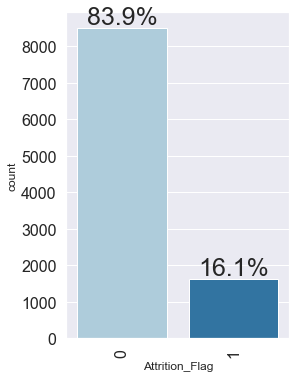

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "Attrition_Flag", 1, perc=True)

- 16.1% of customers are Attrited
- 83.9% of customers are Existing
- There is a lot more Existing customers compared to target variable Attrited customers

#### Observation on Customer_Age

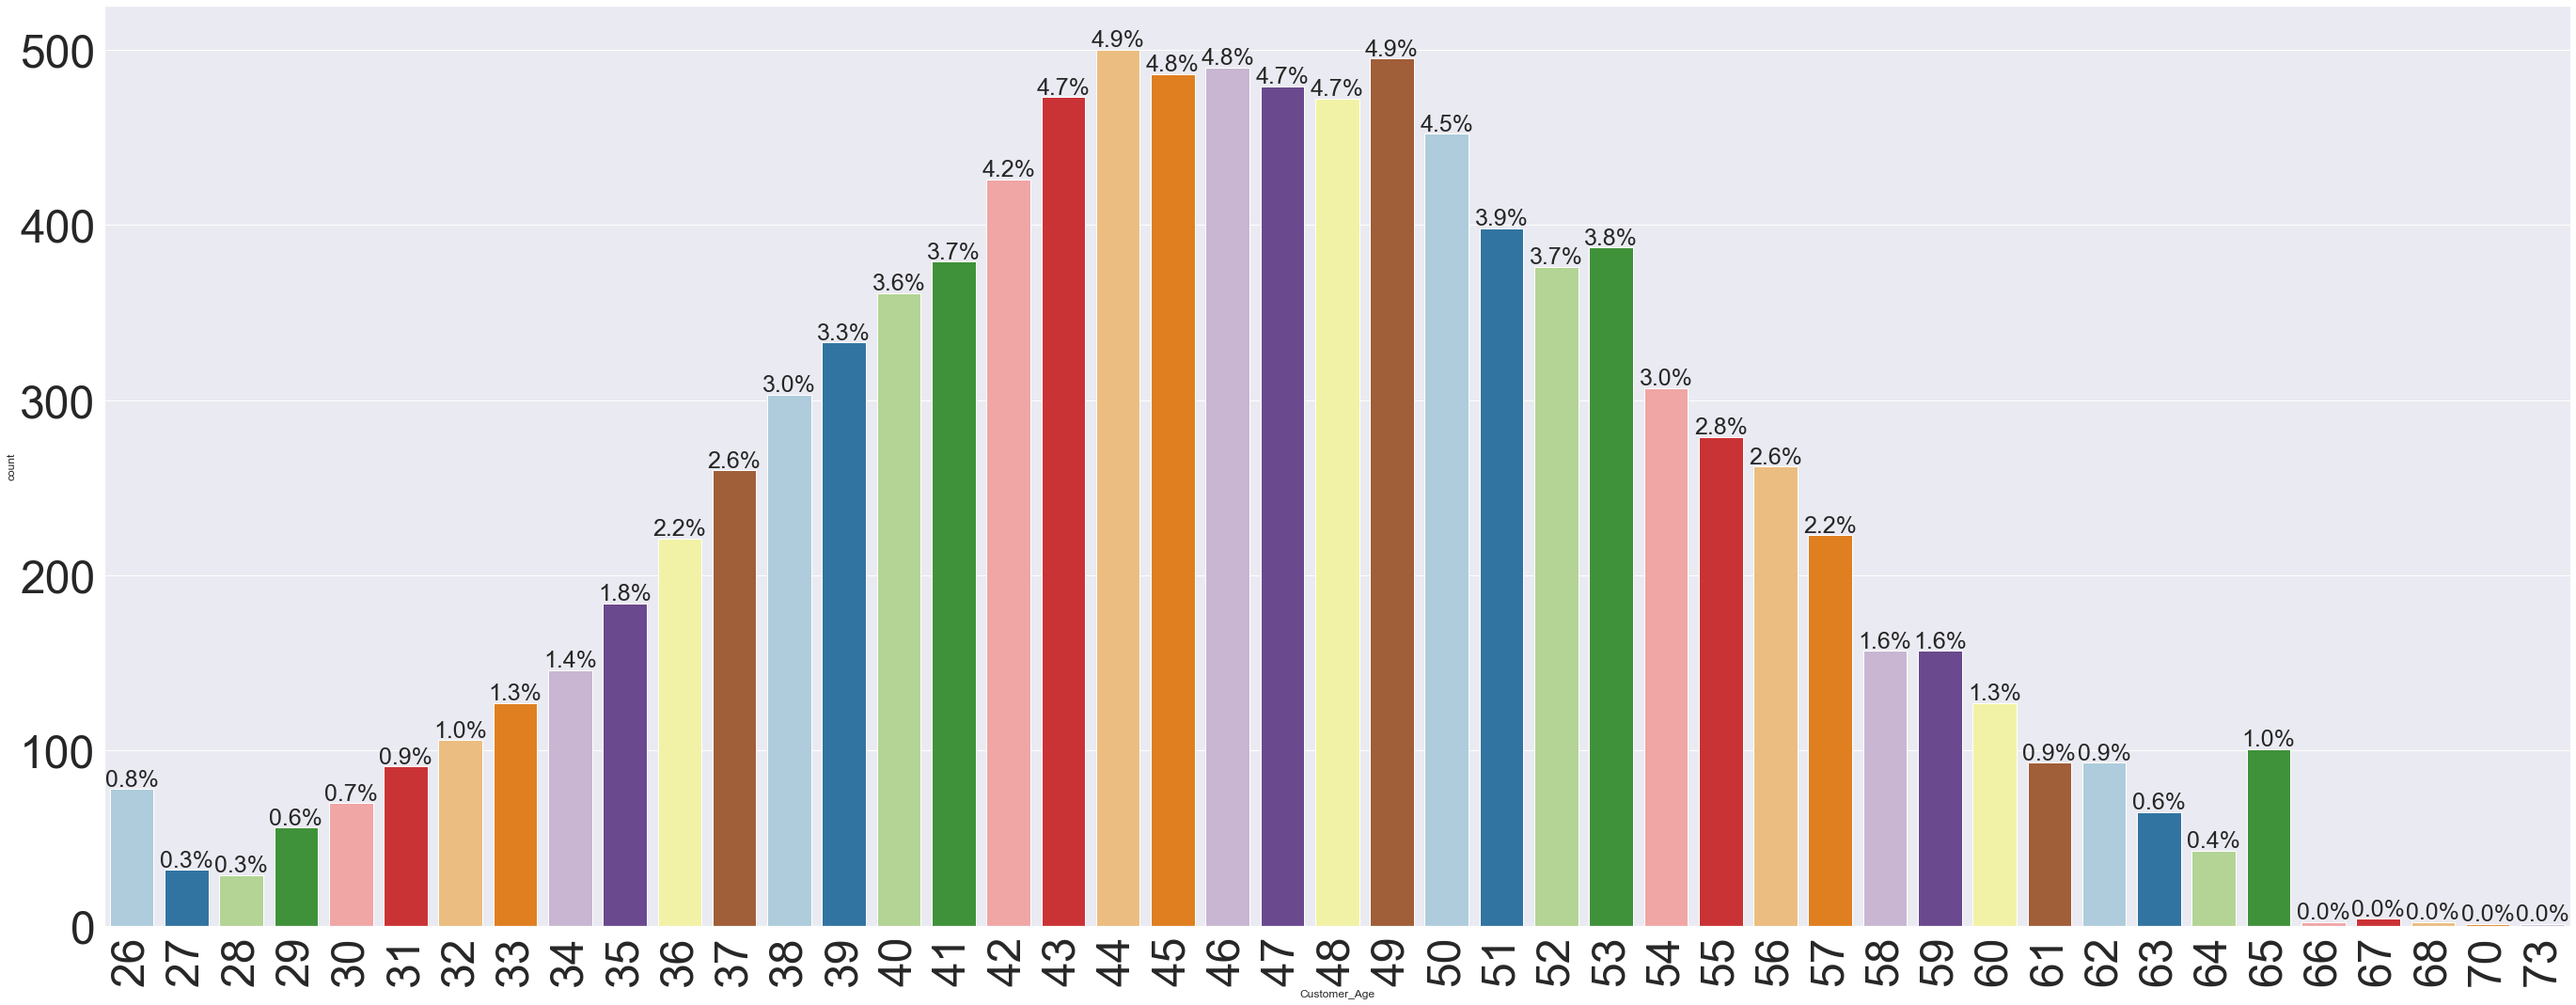

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "Customer_Age", perc=True)

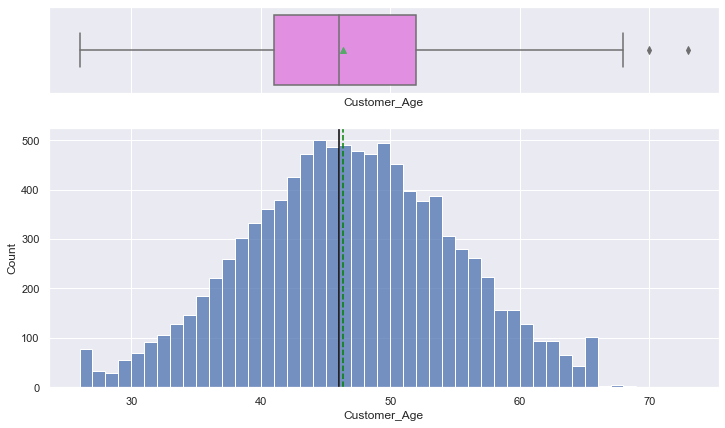

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data, "Customer_Age")

- The Median Age is 46 years old, youngest age is 26 and oldest is 73 years old
- The IQR is between age 41 and 52 with a mean of 46
- There is some outliers in age after 68
- Customer_Age is normal distribution

#### Observation on Gender

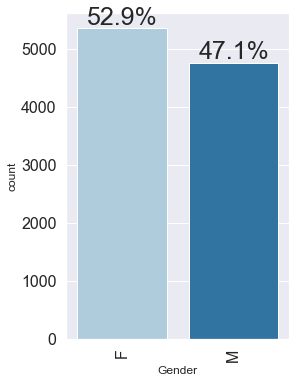

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "Gender", 1, perc=True)

- 52.9% of the customers are Female
- 47.1% of the customers are Male

#### Observation on Dependent_count

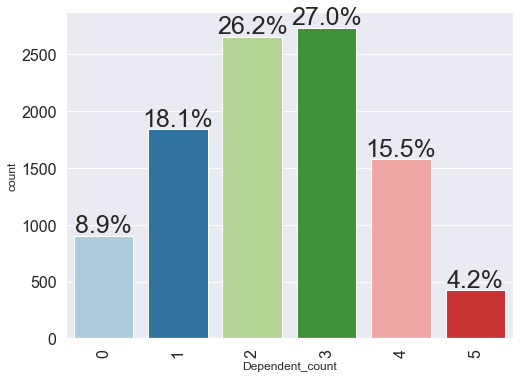

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "Dependent_count", 1, perc=True)

- 8.9% of the customers have no dependent
- 18.1% of the customers have only one dependent
- 26.2% of the customers have two dependent
- 27.0% of the customers have three dependent
- 15.5% of the customers have four dependent
- 4.2% of the customers have five dependent

#### Observation on Education_Level

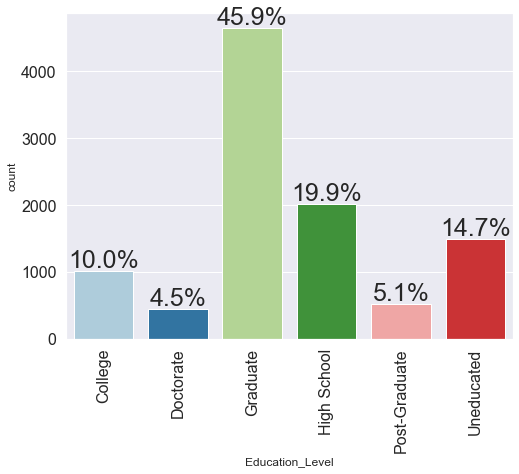

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "Education_Level", 1, perc=True)

- 10.0% of the customers are going to College
- 4.5% of the customers have a Doctorate degree
- 45.9% of the customers have a Graduate degree
- 19.9% of the customers have a High School diploma
- 5.1% of the customers have a Post-Graduate degree
- 14.7% of the customers are Uneducated

#### Observation on Marital_Status

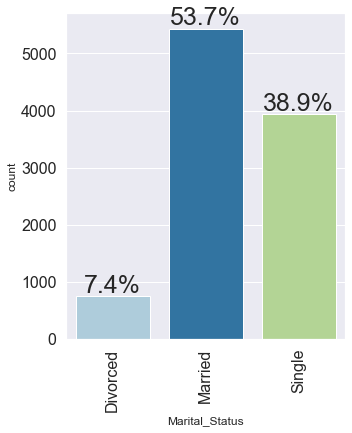

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "Marital_Status", 1, perc=True)

- 7.4% of the customers are Divorced
- 53.7% of the customers are Married
- 38.9% of the customers are Single

#### Observation on Income_Category

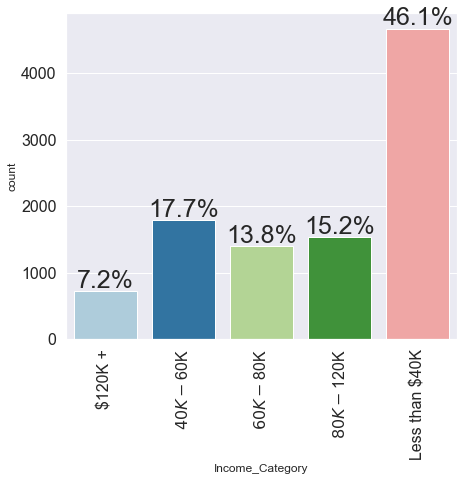

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(data, "Income_Category", 1, perc=True)

- 7.2% of the customers have an Income of more than 120K
- 15.2% of the customers have an Income between 80K - 120K
- 13.8% of the customers have an Income between 60K - 80K
- 17.7% of the customers have an Income between 40K - 60K
- 46.1% of the customers have an Income less than 40K

#### Observation on Card_Category

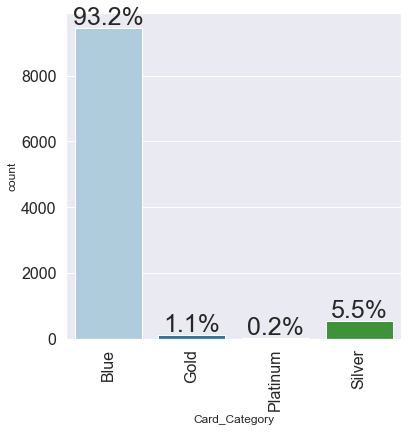

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(data, "Card_Category", 1, perc=True)

- 93.2% of the customers have Blue category card
- 5.5% of the customers have Silver category card
- 1.1% of the customers have Gold category card
- 0.2% of the customers have Platinum category card

#### Observation on Months_on_book

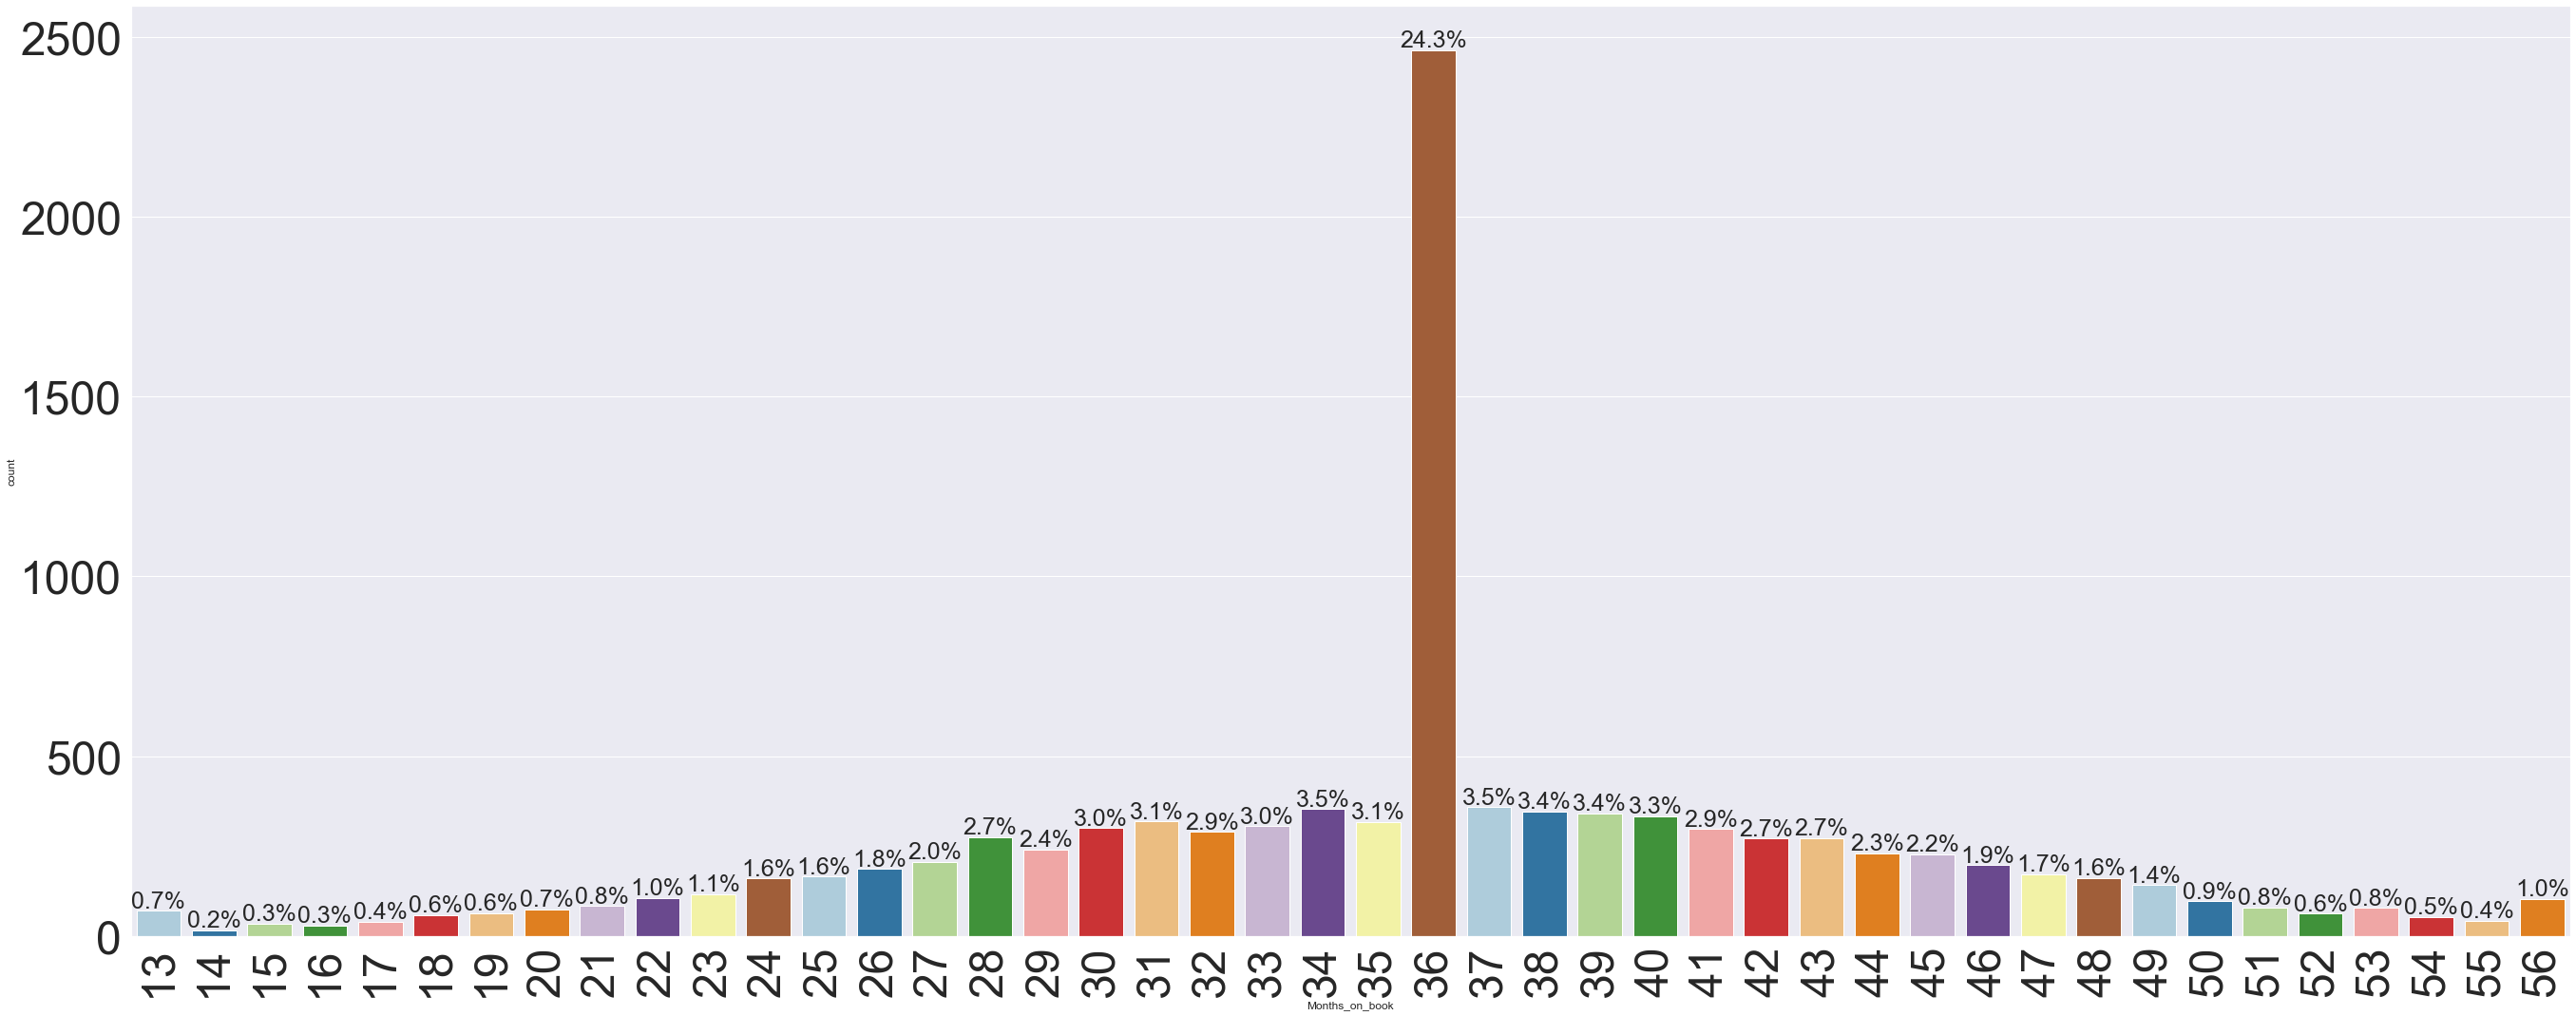

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(data, "Months_on_book", perc=True)

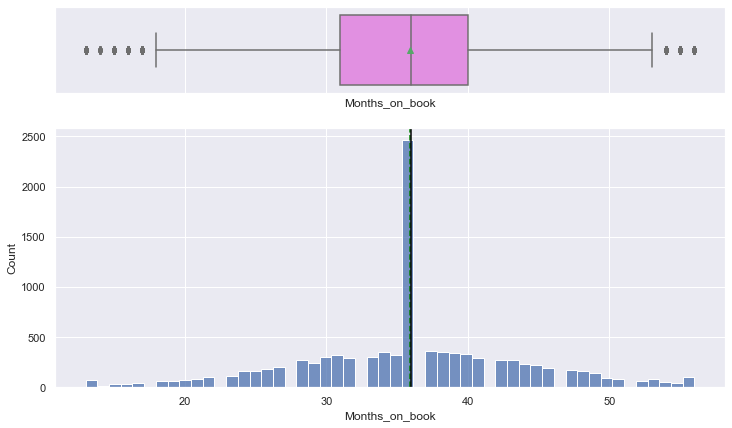

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(data, "Months_on_book")

- The Median is 36 months on the books, ranging from 13 to 56 months on the books
- The IQR is between 31 and 40 months on the books with a mean of 36 months on the books
- There is some outliers in the monthon the books
- Months_on_book is normal distribution

#### Observation on Total_Relationship_Count

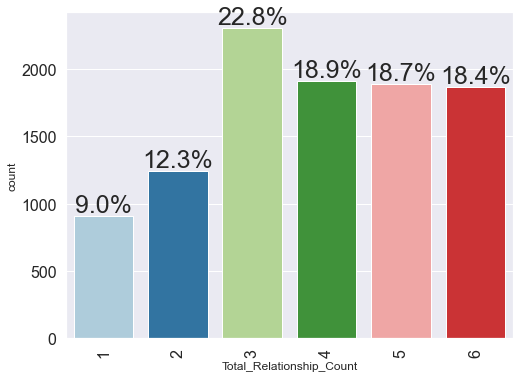

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(data, "Total_Relationship_Count", 1, perc=True)

- 9.0% have only one bank product held by the customer
- 12.3% have two bank products held by the customer
- 22.8% have three bank products held by the customer
- 18.9% have four bank products held by the customer
- 18.7% have five bank products held by the customer
- 18.4% have six bank products held by the customer

#### Observation on Months_Inactive_12_mon

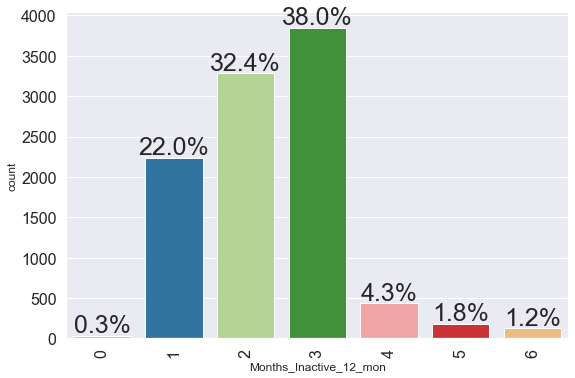

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data, "Months_Inactive_12_mon", 1, perc=True)

- 0.3% of the customers had no inactive months in the last 12 months
- 22.0% of the customers had one inactive month in the last 12 months
- 32.4% of the customers had two inactive months in the last 12 months
- 38.0% of the customers had three inactive months in the last 12 months
- 4.3% of the customers had four inactive months in the last 12 months
- 1.8% of the customers had five inactive months in the last 12 months
- 1.2% of the customers had six inactive months in the last 12 months

#### Observation on Contacts_Count_12_mon

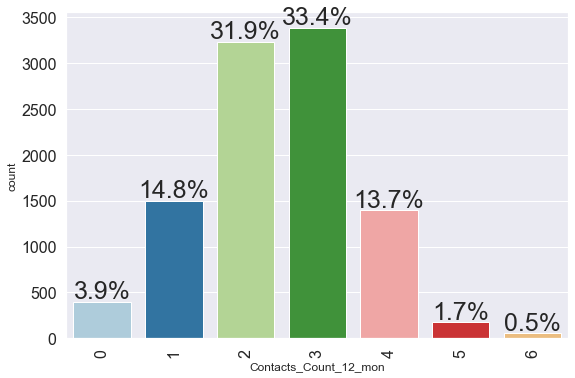

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(data, "Contacts_Count_12_mon", 1, perc=True)

- 3.9% of the customers had no contacts with the bank in the last 12 months
- 14.8% of the customers had one contact with the bank in the last 12 months
- 31.9% of the customers had two contacts with the bank in the last 12 months
- 33.4% of the customers had three contacts with the bank in the last 12 months
- 13.7% of the customers had four contacts with the bank in the last 12 months
- 1.7% of the customers had five contacts with the bank in the last 12 months
- 0.5% of the customers had six contacts with the bank in the last 12 months

#### Observation on Credit_Limit

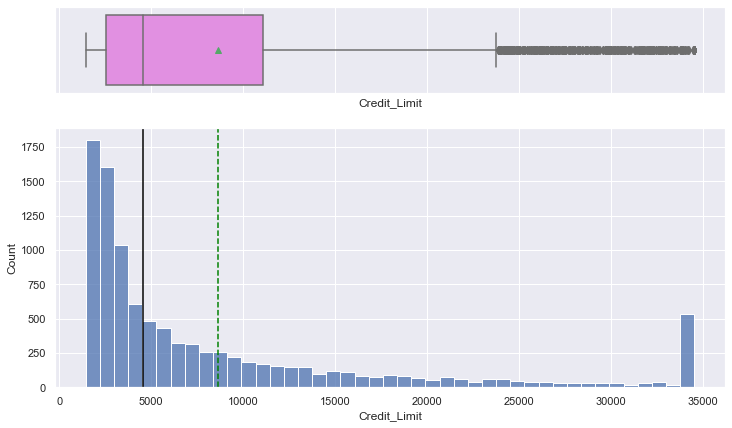

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(data, "Credit_Limit")

- The Median is 4,549 credit limit, ranging from 1,438 to 34,516 credit limit
- The IQR is between 2,555 and 11,068 credit limit with a mean of 8,632 credit limit
- There is some outliers past 24,000 credit limit
- Credit limit is right skewed

#### Observation on Total_Revolving_Bal

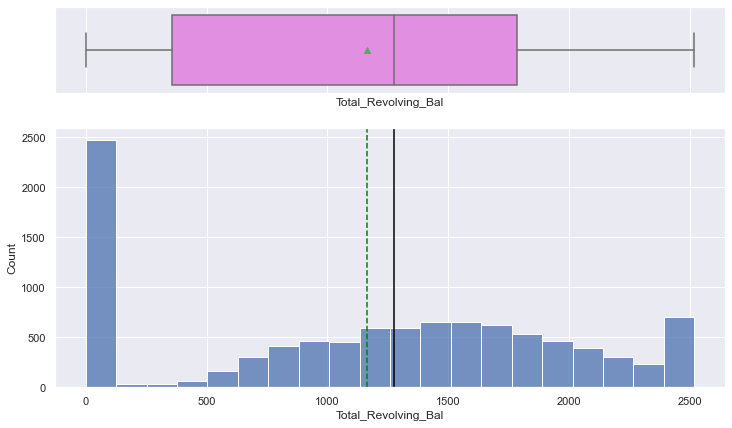

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(data, "Total_Revolving_Bal")

- The Median is 1,276 revolving balance from one month to the next, ranging from 0 to 2,517 revolving balance
- The IQR is between 359 and 1,784 revolving balance from one month to the next with a mean of 1,163 revolving balance
- There is no outliers in revolving balance from one month to the next

#### Observation on Avg_Open_To_Buy

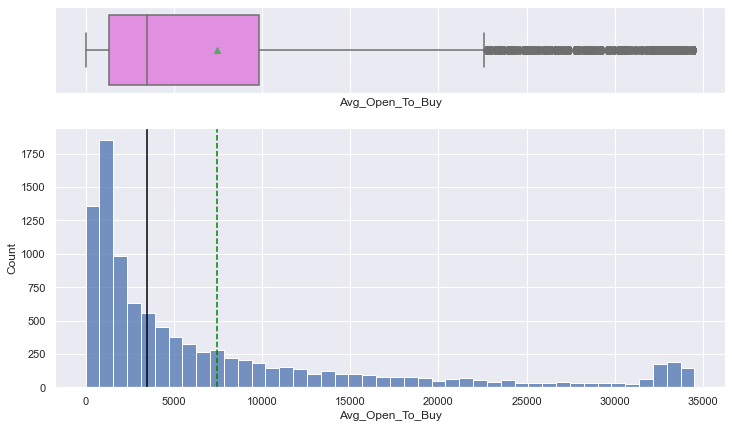

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(data, "Avg_Open_To_Buy")

- The Median is 3,474 Avg left on the credit card, ranging from 3 to 34,516 Avg left on the credit card
- The IQR is between 1,325 and 9,859 Avg left on the credit card with a mean of 7,469 Avg left on the credit card
- There is some outliers past 24,000 Avg left on the credit card
- Avg left on the credit card (Avg_Open_To_Buy) is right skewed

#### Observation on Total_Amt_Chng_Q4_Q1

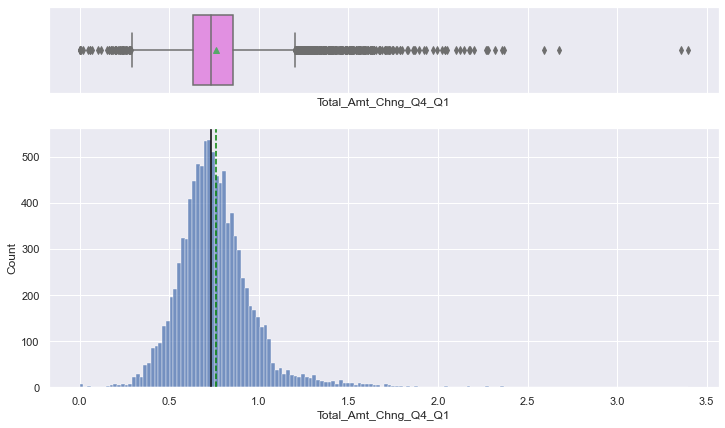

<IPython.core.display.Javascript object>

In [40]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

- The Median is 0.74 ratio change from Q4 and Q1, ranging from 0 to 3.4 ratio change from Q4 and Q1
- The IQR is between 0.63 and 0.86 ratio change from Q4 and Q1 with a mean of 0.76 ratio change from Q4 and Q1
- There is some outliers past 2.5 ratio change from Q4 and Q1
- Ratio change from Q4 and Q1 (Total_Amt_Chng_Q4_Q1) is right skewed

#### Observation on Total_Trans_Amt

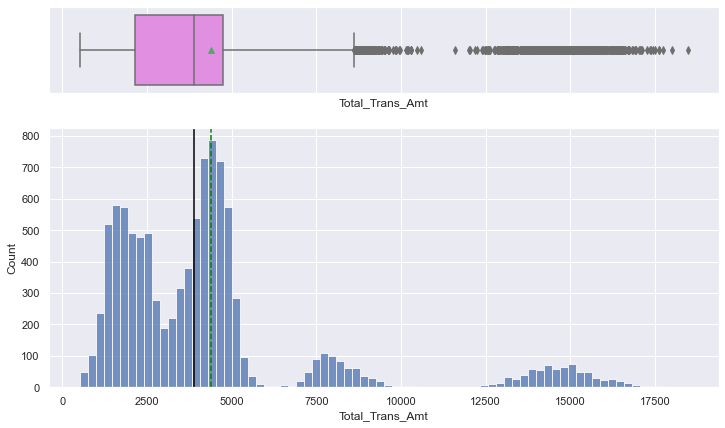

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(data, "Total_Trans_Amt")

- The Median is 3,899 total transaction amount, ranging from 510 to 18,484 total transaction amount
- The IQR is between 2,156 and 4,741 total transaction amount with a mean of 4,404 total transaction amount
- There is some outliers past 9,000 total transaction amount
- Total transaction amount is right skewed

#### Observation on Total_Trans_Ct

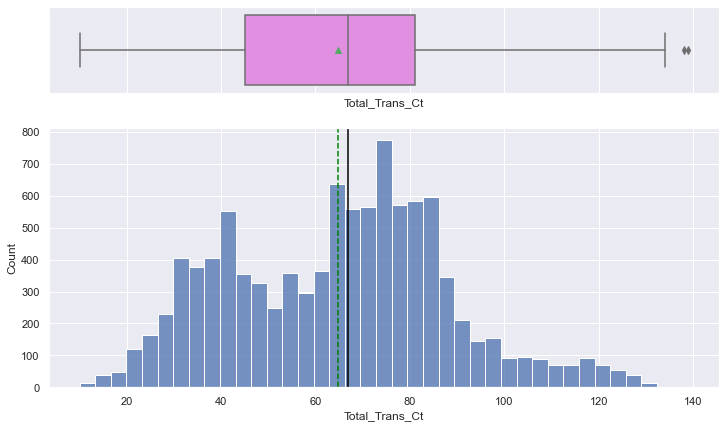

<IPython.core.display.Javascript object>

In [42]:
histogram_boxplot(data, "Total_Trans_Ct")

- The Median is 67 total transaction count, ranging from 10 to 139 total transaction count
- The IQR is between 45 and 81 total transaction count with a mean of 65 total transaction count
- There is some outliers past 134 total transaction count
- Total transaction count is normal distribution

#### Observation on Total_Ct_Chng_Q4_Q1

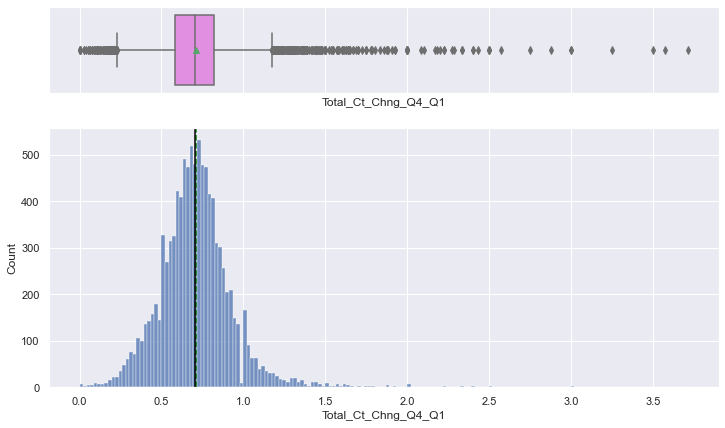

<IPython.core.display.Javascript object>

In [43]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

- The Median is 0.7 ratio of total transaction count from Q4 and Q1, ranging from 0 to 3.7 ratio of total transaction count from Q4 and Q1
- The IQR is between 0.6 and 0.8 ratio of total transaction count from Q4 and Q1 with a mean of 0.7 ratio of total transaction count from Q4 and Q1
- There is some outliers past 1.2 ratio of total transaction count from Q4 and Q1
- Ratio of total transaction count from Q4 and Q1 is right skewed

#### Observation on Avg_Utilization_Ratio

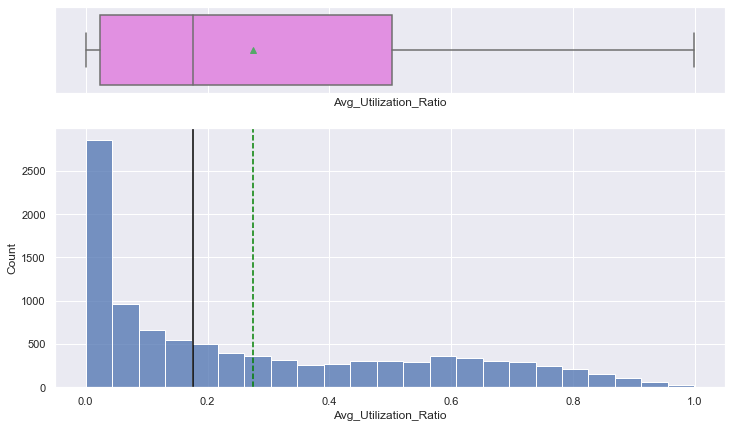

<IPython.core.display.Javascript object>

In [44]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

- The Median is 0.18 ratio of avaiable credit the customer spent, ranging from 0 to 1 ratio of avaiable credit the customer spent
- The IQR is between 0.02 and 0.50 ratio of avaiable credit the customer spent with a mean of 0.27 ratio of avaiable credit the customer spent
- There is no outliers in ratio of avaiable credit the customer spent
- Ratio of avaiable credit the customer spent is right skewed

### Bivariate Analysis

In [45]:
# function to plot boxplot chart
def boxplot_chart(data_chart, x_axis, y_axis, x_rotation=0, figuresize=12):
    plt.figure(figsize=(15, 7))
    sns.boxplot(data=data_chart, x=x_axis, y=y_axis, palette="PuBu")
    plt.xticks(rotation=x_rotation, fontsize=figuresize)
    plt.show()


# function to plot scatterplot chart
def scatterplot(data_chart, x_axis, y_axis, hue_chart):
    plt.figure(figsize=(40, 20))
    sns.scatterplot(data=data_chart, x=x_axis, y=y_axis, hue=hue_chart)
    plt.xticks(rotation=90, fontsize=50)
    plt.yticks(fontsize=40)
    plt.xlabel(x_axis, fontsize=50)
    plt.ylabel(y_axis, fontsize=50)
    plt.legend(loc="upper left", prop={"size": 20}, bbox_to_anchor=(1, 1))
    plt.show()


# function to plot stripplot chart
def stripplot_chart(data_chart, x_axis, y_axis, hue_chart):
    plt.figure(figsize=(40, 20))
    sns.stripplot(data=data_chart, x=x_axis, y=y_axis, hue=hue_chart, jitter=True)
    plt.xticks(rotation=90, fontsize=50)
    plt.yticks(fontsize=40)
    plt.xlabel(x_axis, fontsize=50)
    plt.ylabel(y_axis, fontsize=50)
    plt.legend(loc="upper left", prop={"size": 20}, bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

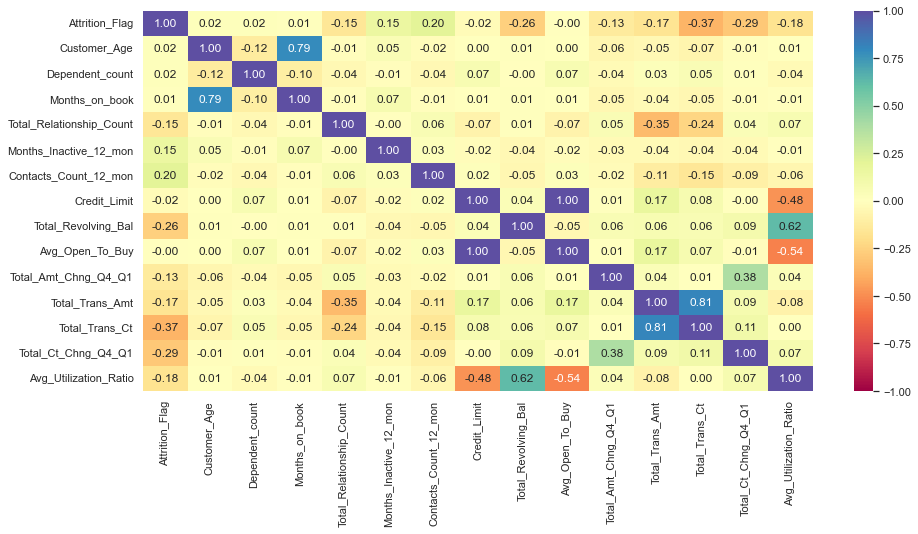

<IPython.core.display.Javascript object>

In [46]:
# Show heat map and correlation between variables
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There is a strong positive correlation between Credit_Limit and Avg_Open_To_Buy
- There is a strong positive correlation between Total_Trans_Amt and Total_Trans_Ct
- There is a strong positive correlation between Months_on_book and Customer_Age
- There is a positive correlation between Total_Revolving_Bal and Avg_Utilization_Ratio
- There is a negitive correlation between Avg_Open_To_Buy and Avg_Utilization_Ratio
- There is a negitive correlation between Credit_Limit and Avg_Utilization_Ratio
- There is a positive correlation between Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1
- There is a negitive correlation between Total_Relationship_Count and Total_Trans_Amt
- There is a negitive correlation between Total_Relationship_Count and Total_Trans_Ct
- There is a small positive correlation between Credit_Limit and Total_Trans_Amt
- There is a small positive correlation between Avg_Open_To_Buy and Total_Trans_Amt
- There is a small negitive correlation between Contacts_Count_12_mon and Total_Trans_Ct

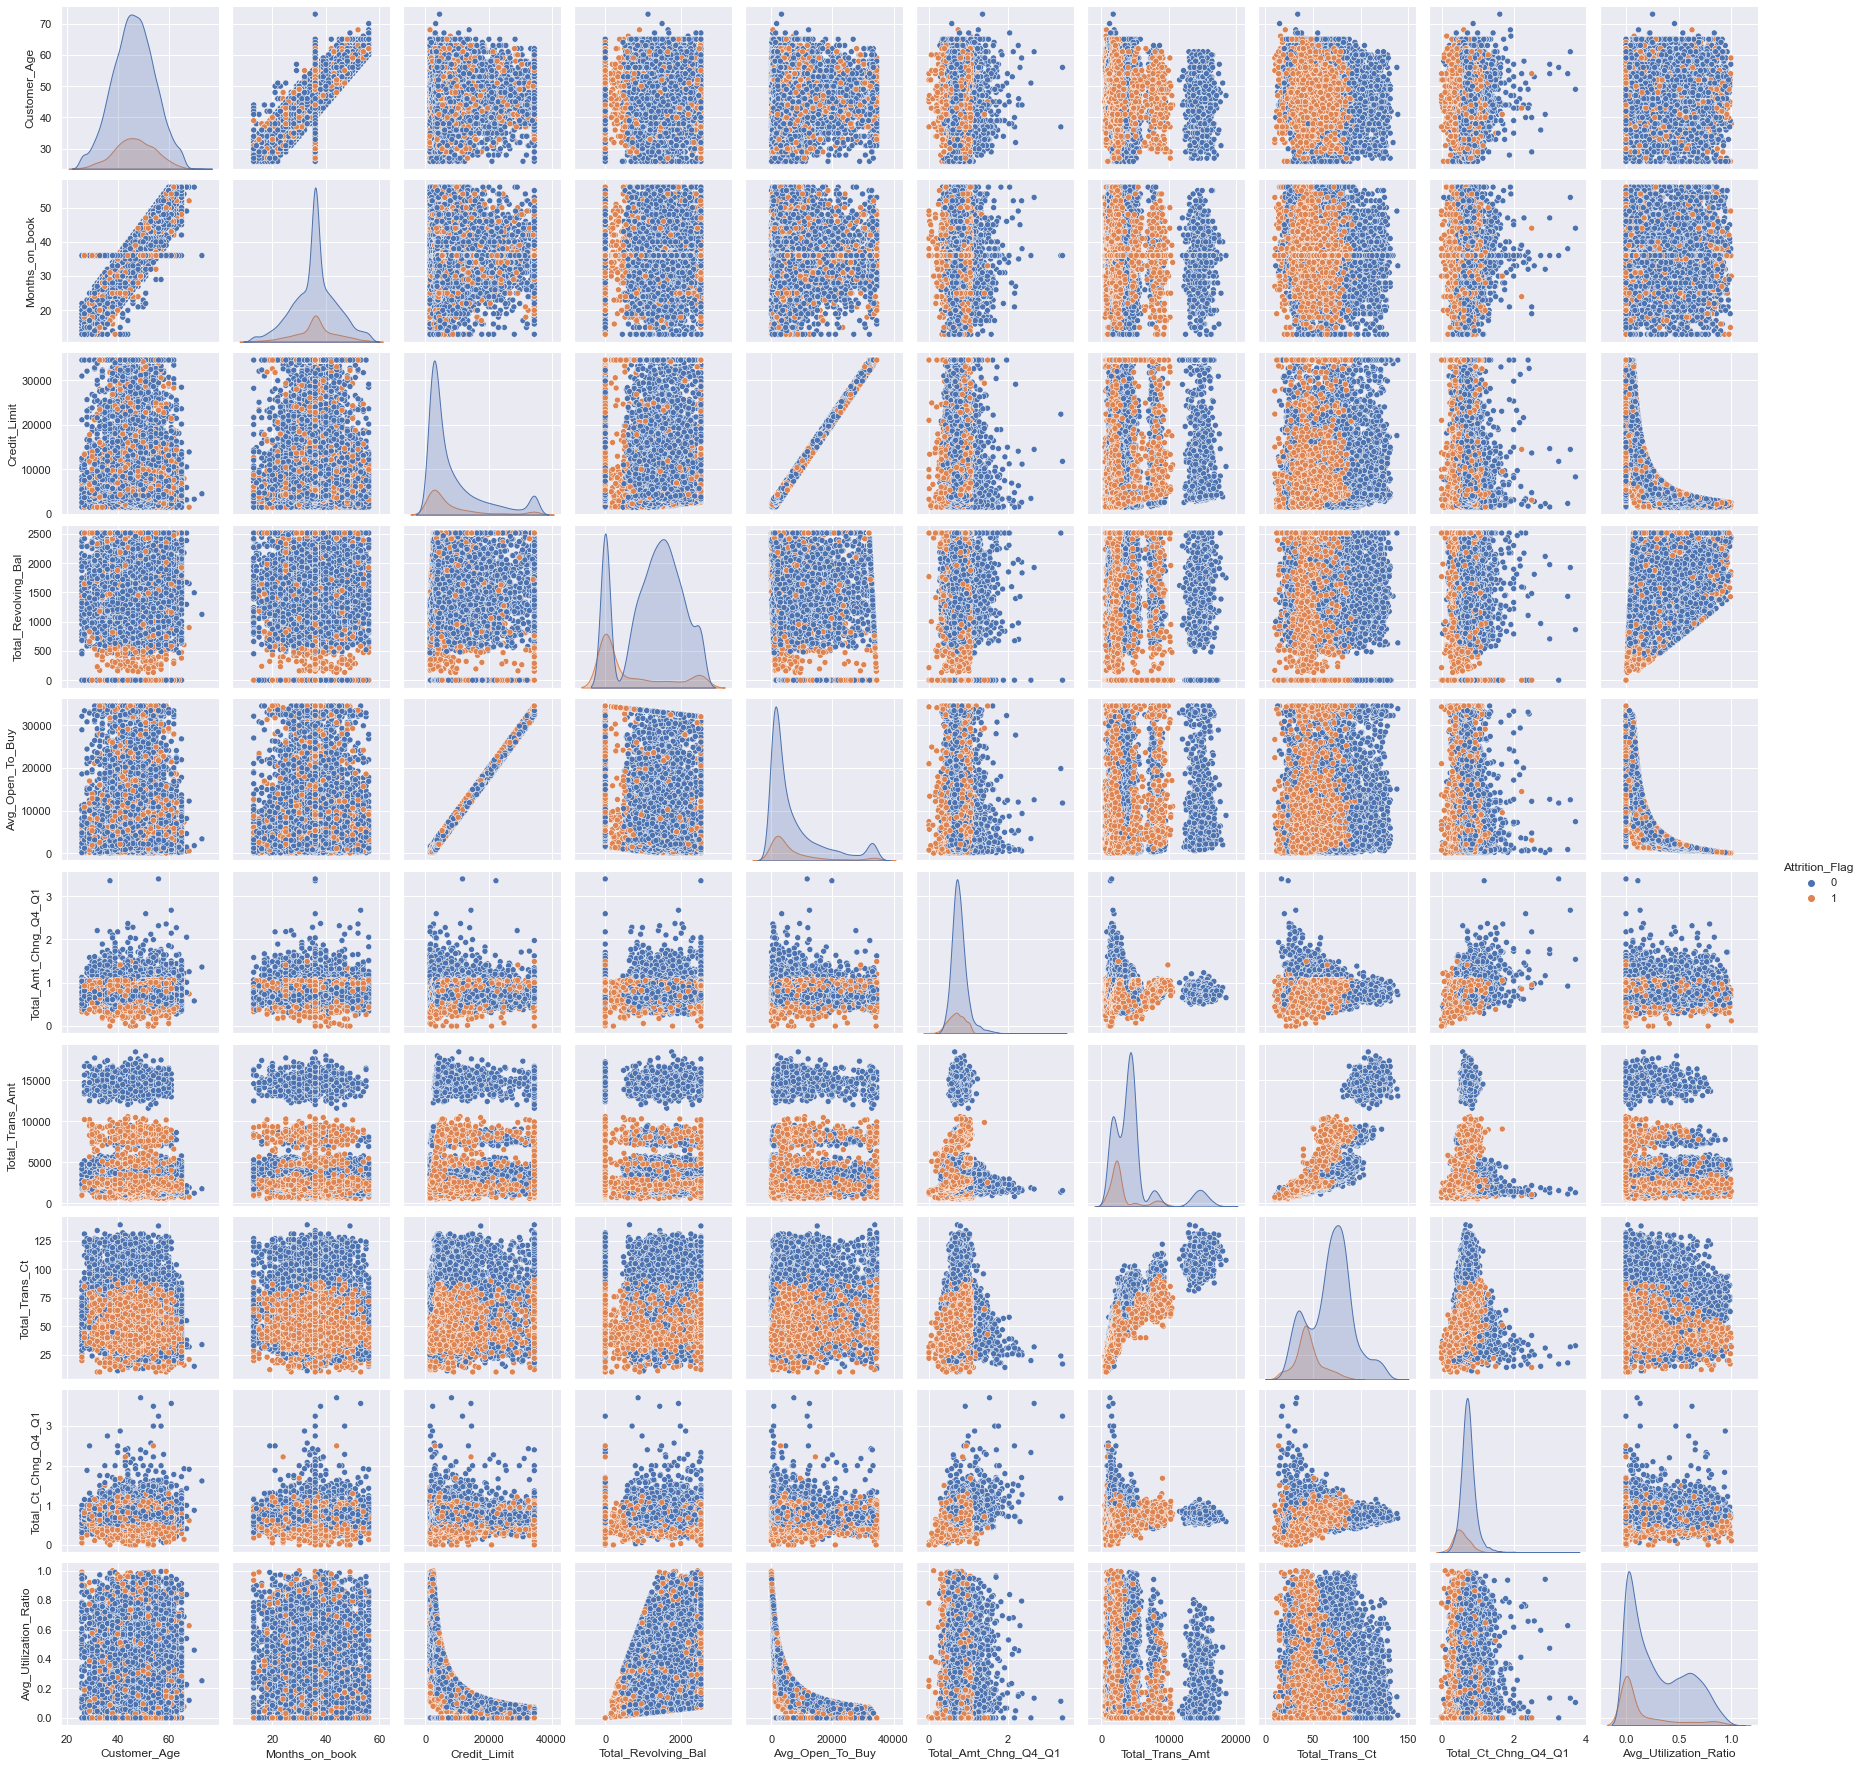

<IPython.core.display.Javascript object>

In [47]:
# show pairplot of dataset
sns.pairplot(
    data=data.drop(
        [
            "Dependent_count",
            "Months_Inactive_12_mon",
            "Contacts_Count_12_mon",
            "Total_Relationship_Count",
        ],
        axis=1,
    ),
    hue="Attrition_Flag",
    diag_kind="kde",
)
plt.show()

- Attrited Customers have lower Total_Trans_Ct compared to Existing Customers
- Attrited Customers have lower Total_Trans_Amt compared to Existing Customers
- Attrited Customers have lower Total_Ct_Chag_Q4_Q1 compared to Existing Customers
- Attrited Customers have lower Total_Amt_Chag_Q4_Q1 compared to Existing Customers

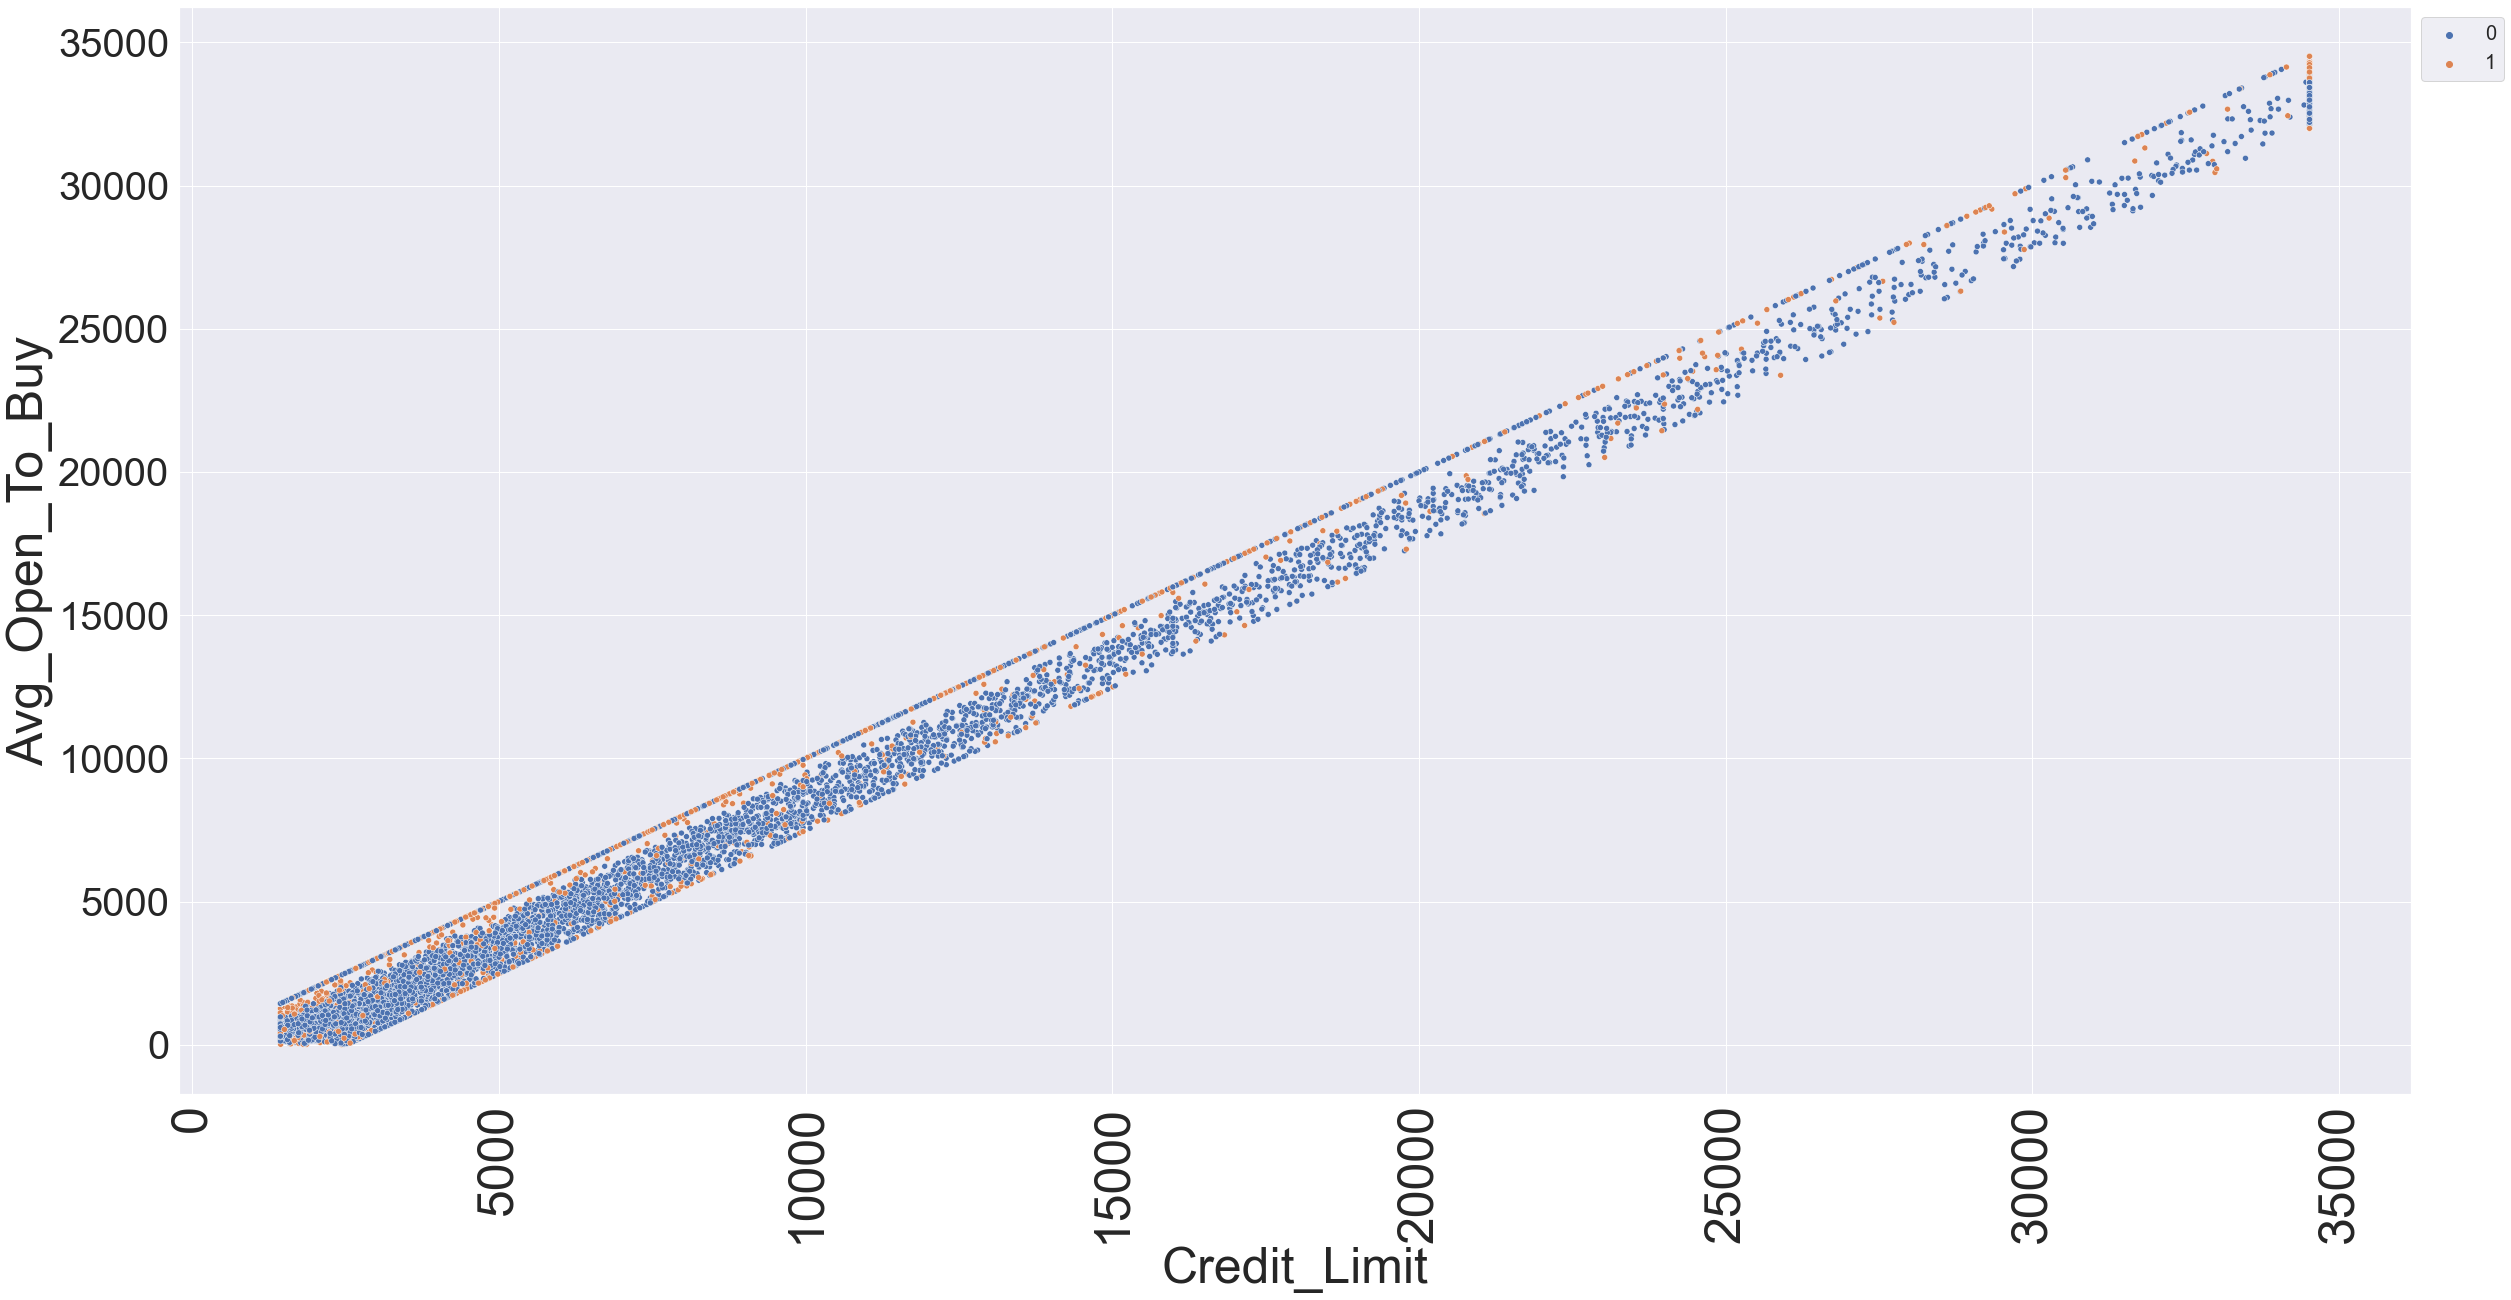

<IPython.core.display.Javascript object>

In [48]:
scatterplot(data, "Credit_Limit", "Avg_Open_To_Buy", "Attrition_Flag")

- Increase in credit limit has a direct correlation to the customers Avg_Open_To_Buy

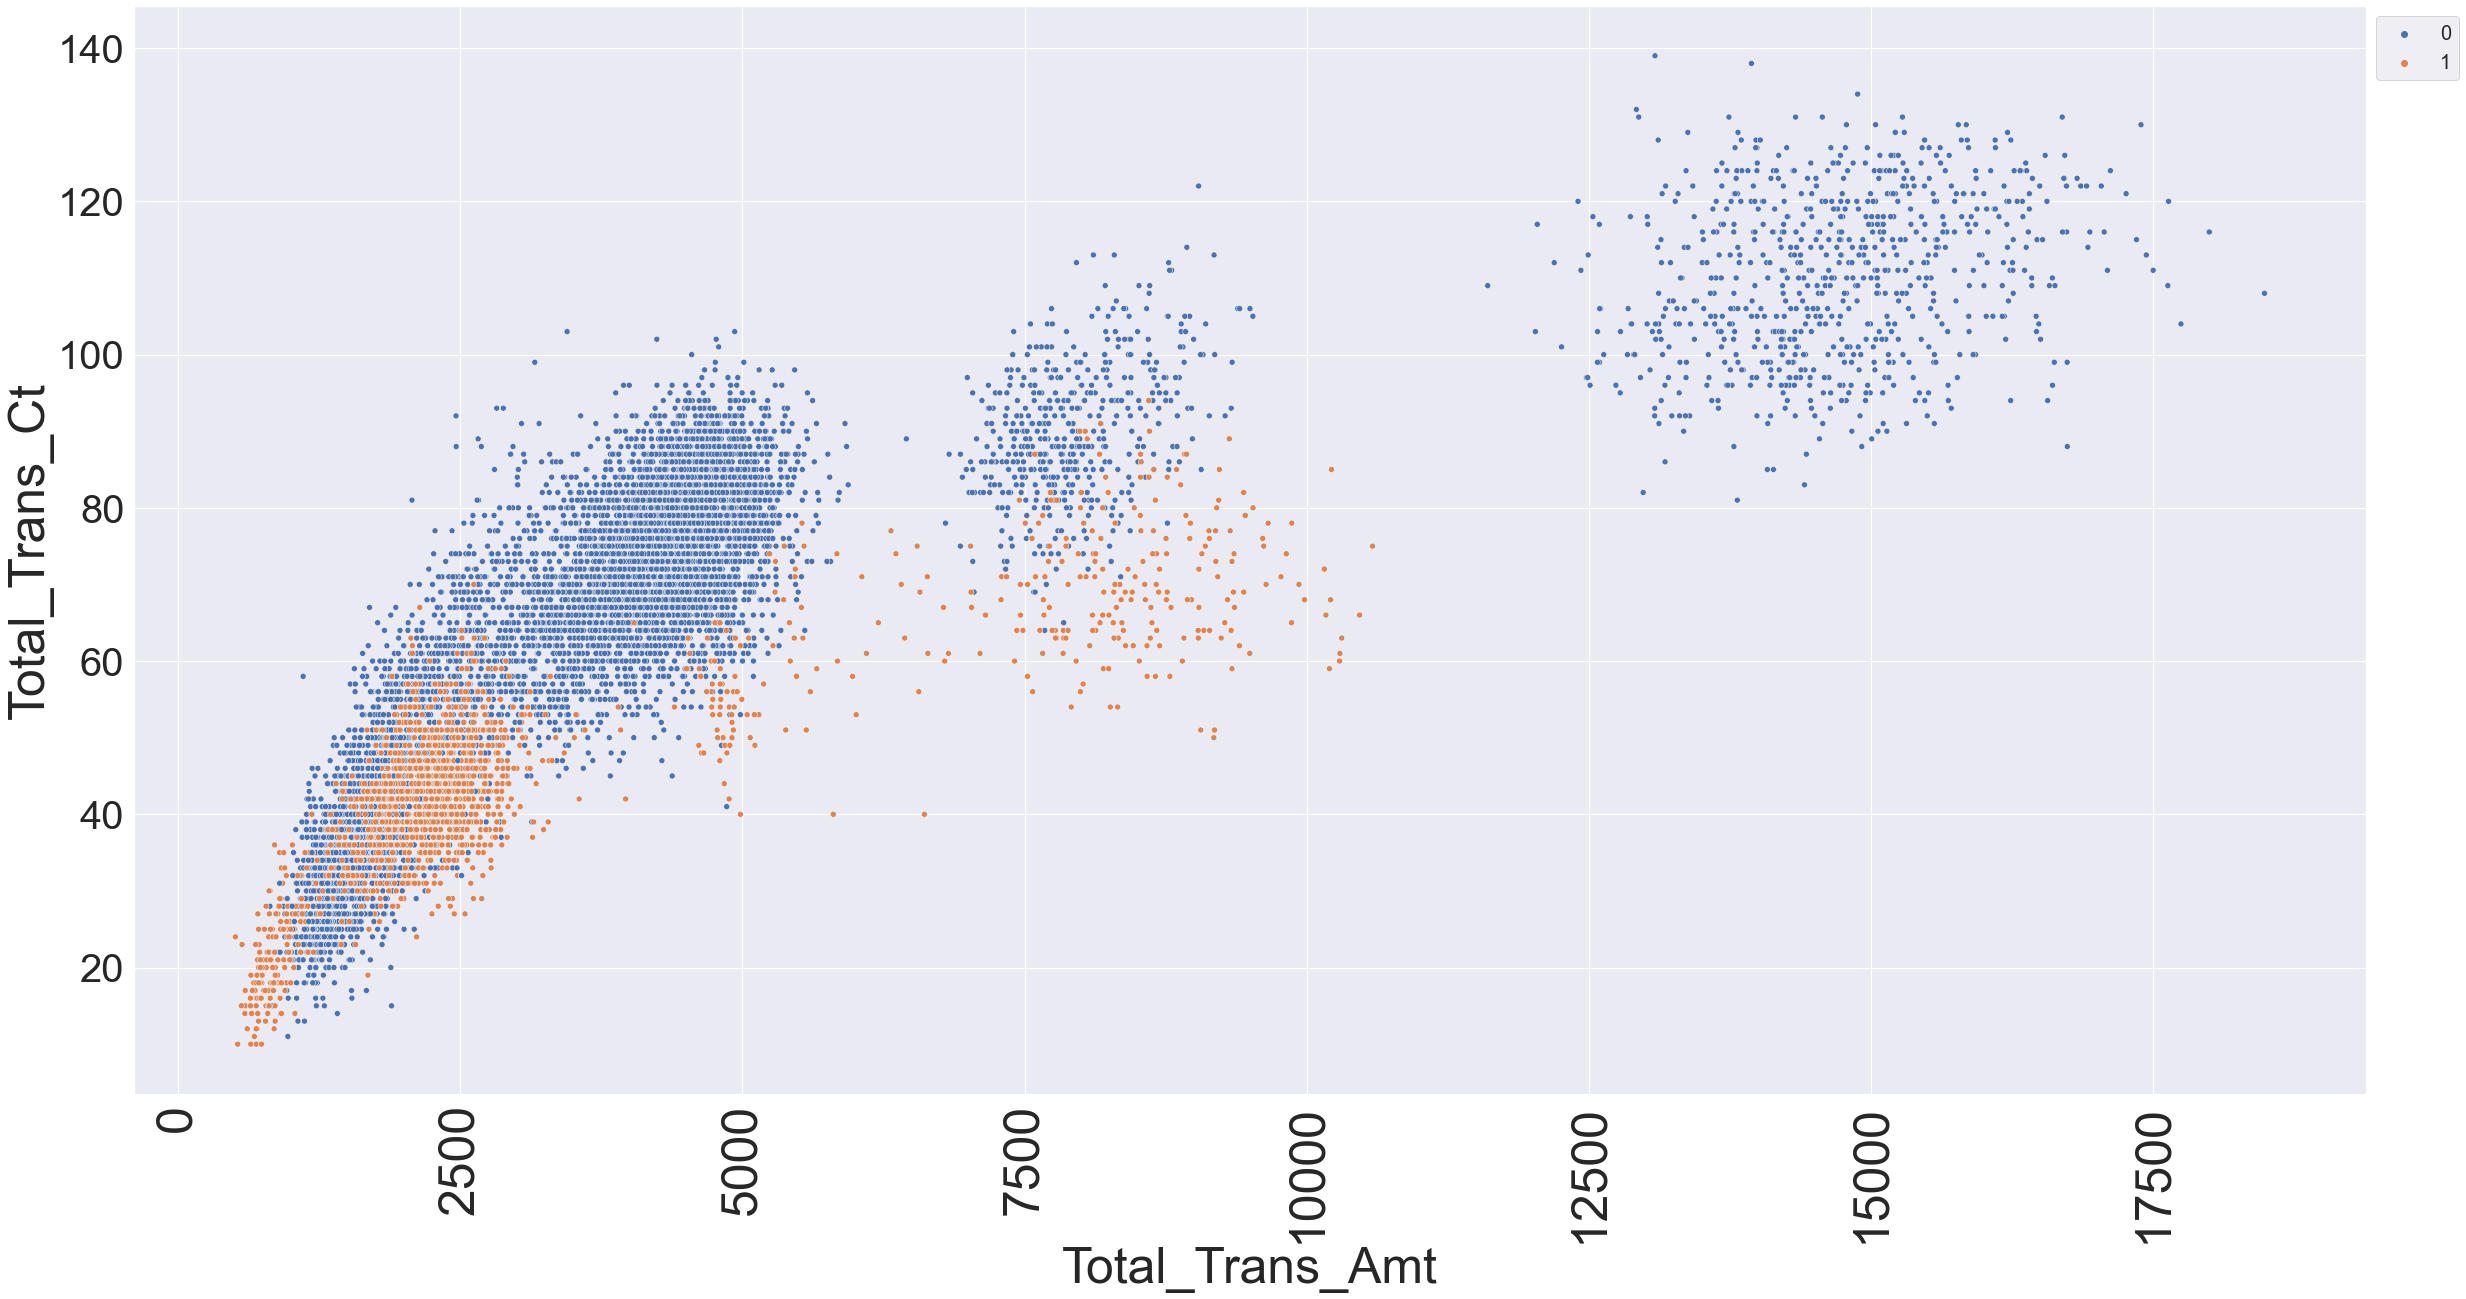

<IPython.core.display.Javascript object>

In [49]:
scatterplot(data, "Total_Trans_Amt", "Total_Trans_Ct", "Attrition_Flag")

- Total_Trans_Amt and Total_Trans_Ct are lower for Attrited customers
- Higher Total_Trans_Amt has a positive correlation to Total_Trans_Ct

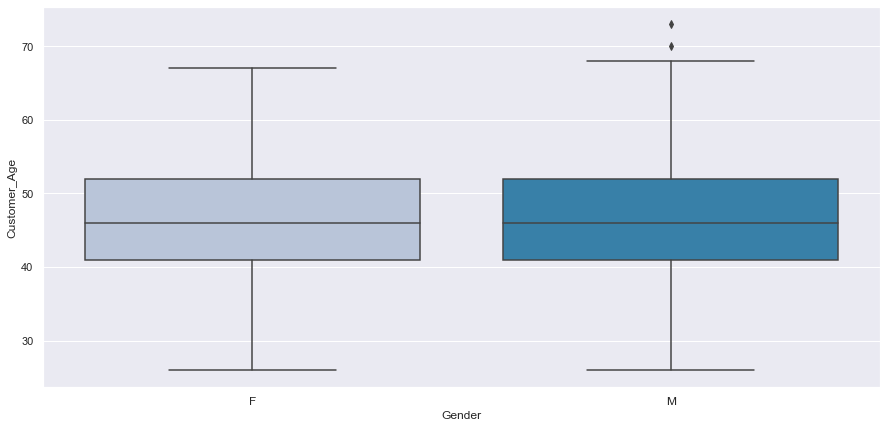

<IPython.core.display.Javascript object>

In [50]:
boxplot_chart(data, "Gender", "Customer_Age")

- The average customer age is equally distributed between Male and Female

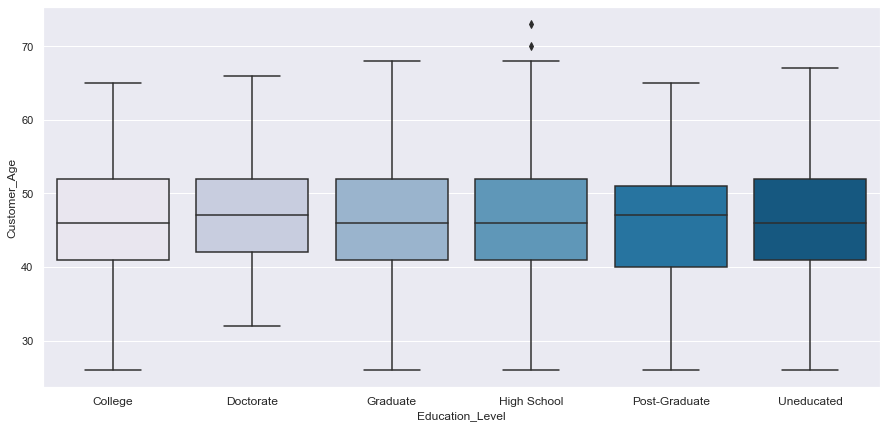

<IPython.core.display.Javascript object>

In [51]:
boxplot_chart(data, "Education_Level", "Customer_Age")

- The Education Level is average about the same Customer age across all Education Levels

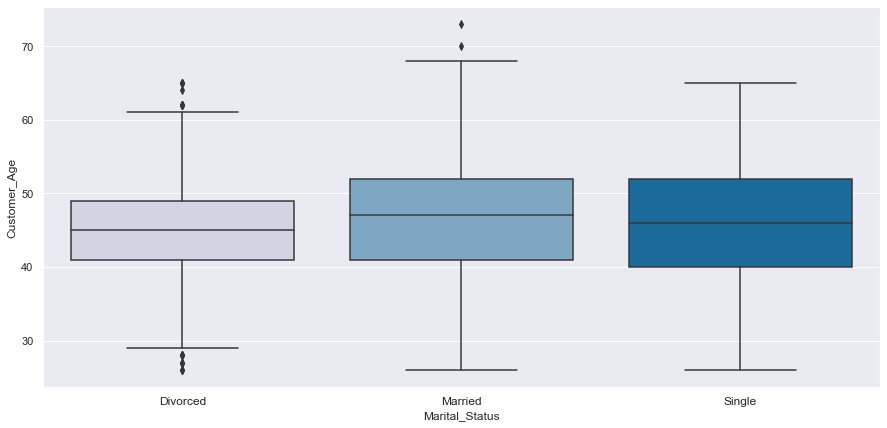

<IPython.core.display.Javascript object>

In [52]:
boxplot_chart(data, "Marital_Status", "Customer_Age")

- Divorced and Married customers have a few outliers in Customer Age
- Single customers have a larger IQR Age range than both Married and Divorced customers

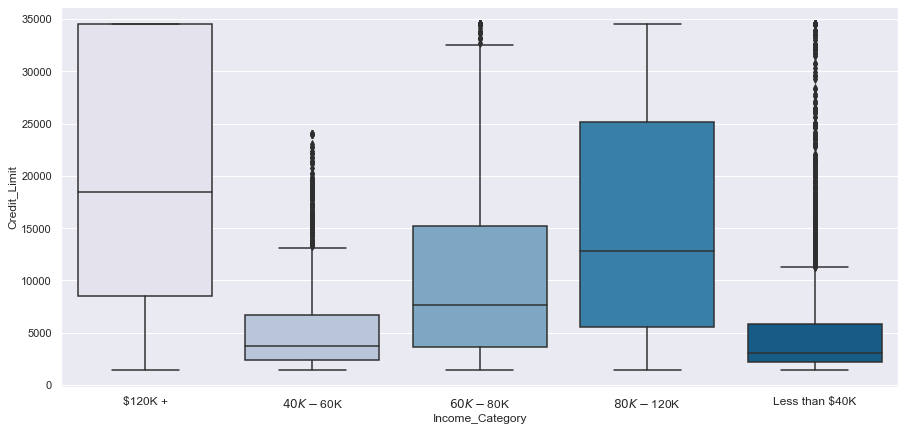

<IPython.core.display.Javascript object>

In [53]:
boxplot_chart(data, "Income_Category", "Credit_Limit")

- The higher the Income Category the larger the Credit Limit

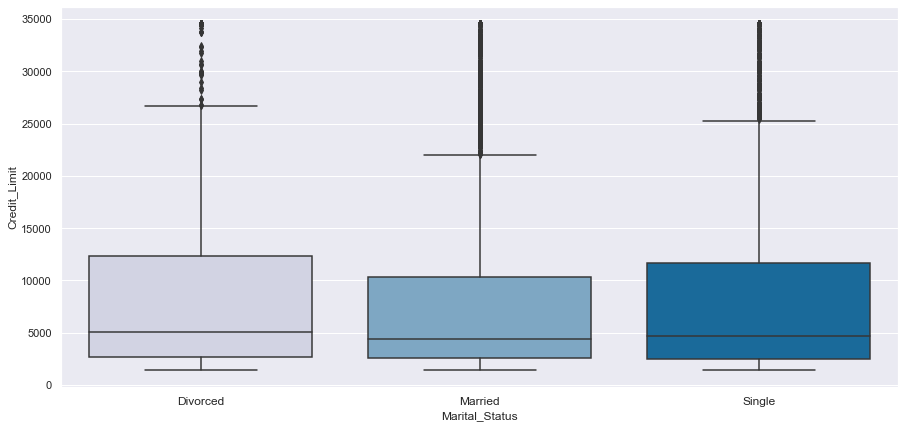

<IPython.core.display.Javascript object>

In [54]:
boxplot_chart(data, "Marital_Status", "Credit_Limit")

- Divorced and Singles have a higher credit limit on average than Married customers

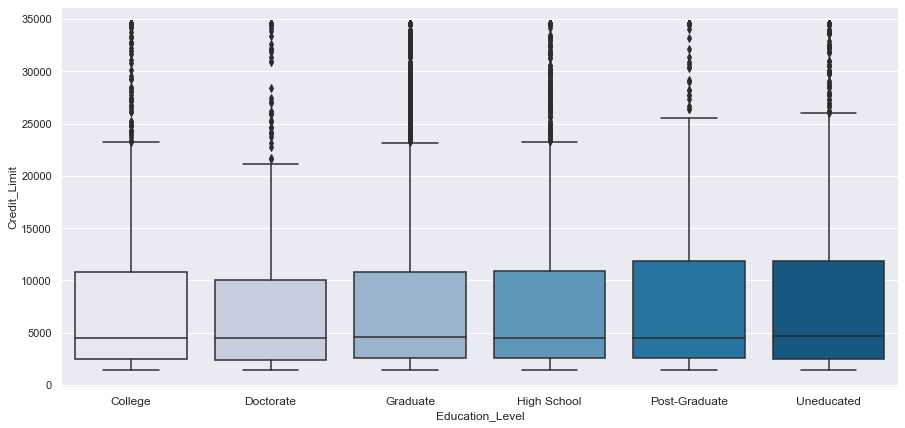

<IPython.core.display.Javascript object>

In [55]:
boxplot_chart(data, "Education_Level", "Credit_Limit")

- Education Level has no affect on customer credit limit

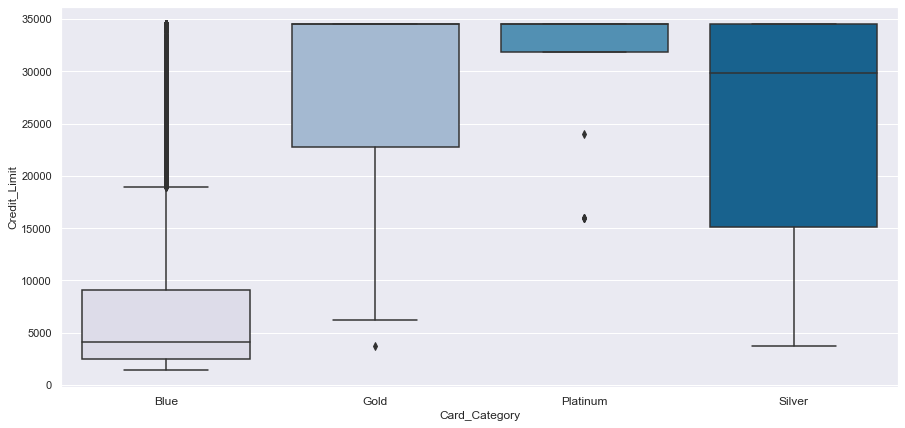

<IPython.core.display.Javascript object>

In [56]:
boxplot_chart(data, "Card_Category", "Credit_Limit")

- Platinum card customers have the highest credit limit
- Gold card customers have the second highest credit limit
- Silver card customers have the third highest credit limit
- Blue card customers usually have a low credit limit

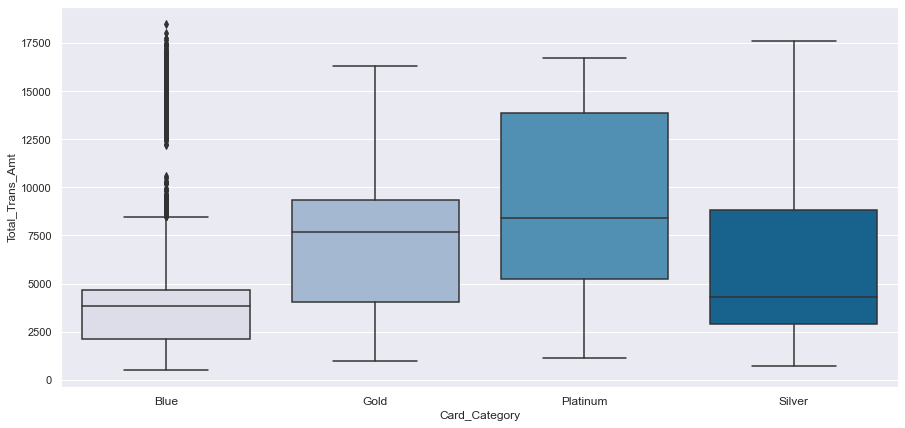

<IPython.core.display.Javascript object>

In [57]:
boxplot_chart(data, "Card_Category", "Total_Trans_Amt")

- Platimum card customers have the highest Total_Trans_Amt
- Blue card customers have the lowest Total_Trans_Amt

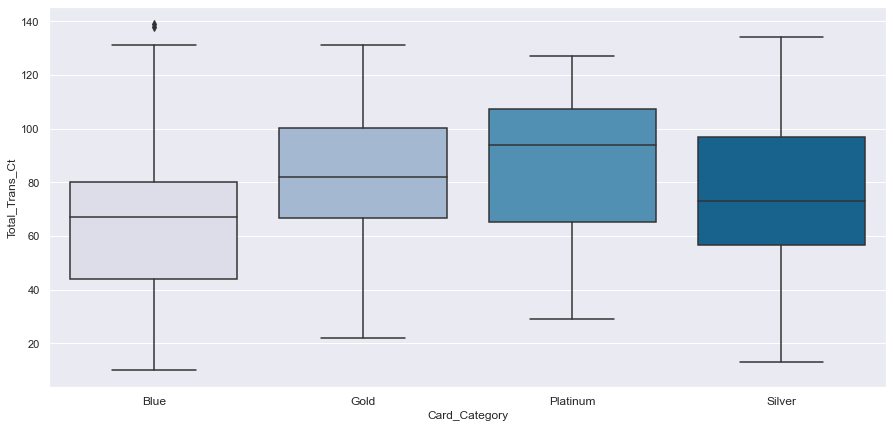

<IPython.core.display.Javascript object>

In [58]:
boxplot_chart(data, "Card_Category", "Total_Trans_Ct")

- Platimum card customers have the highest Total_Trans_Ct
- Blue card customers have the lowest Total_Trans_Ct

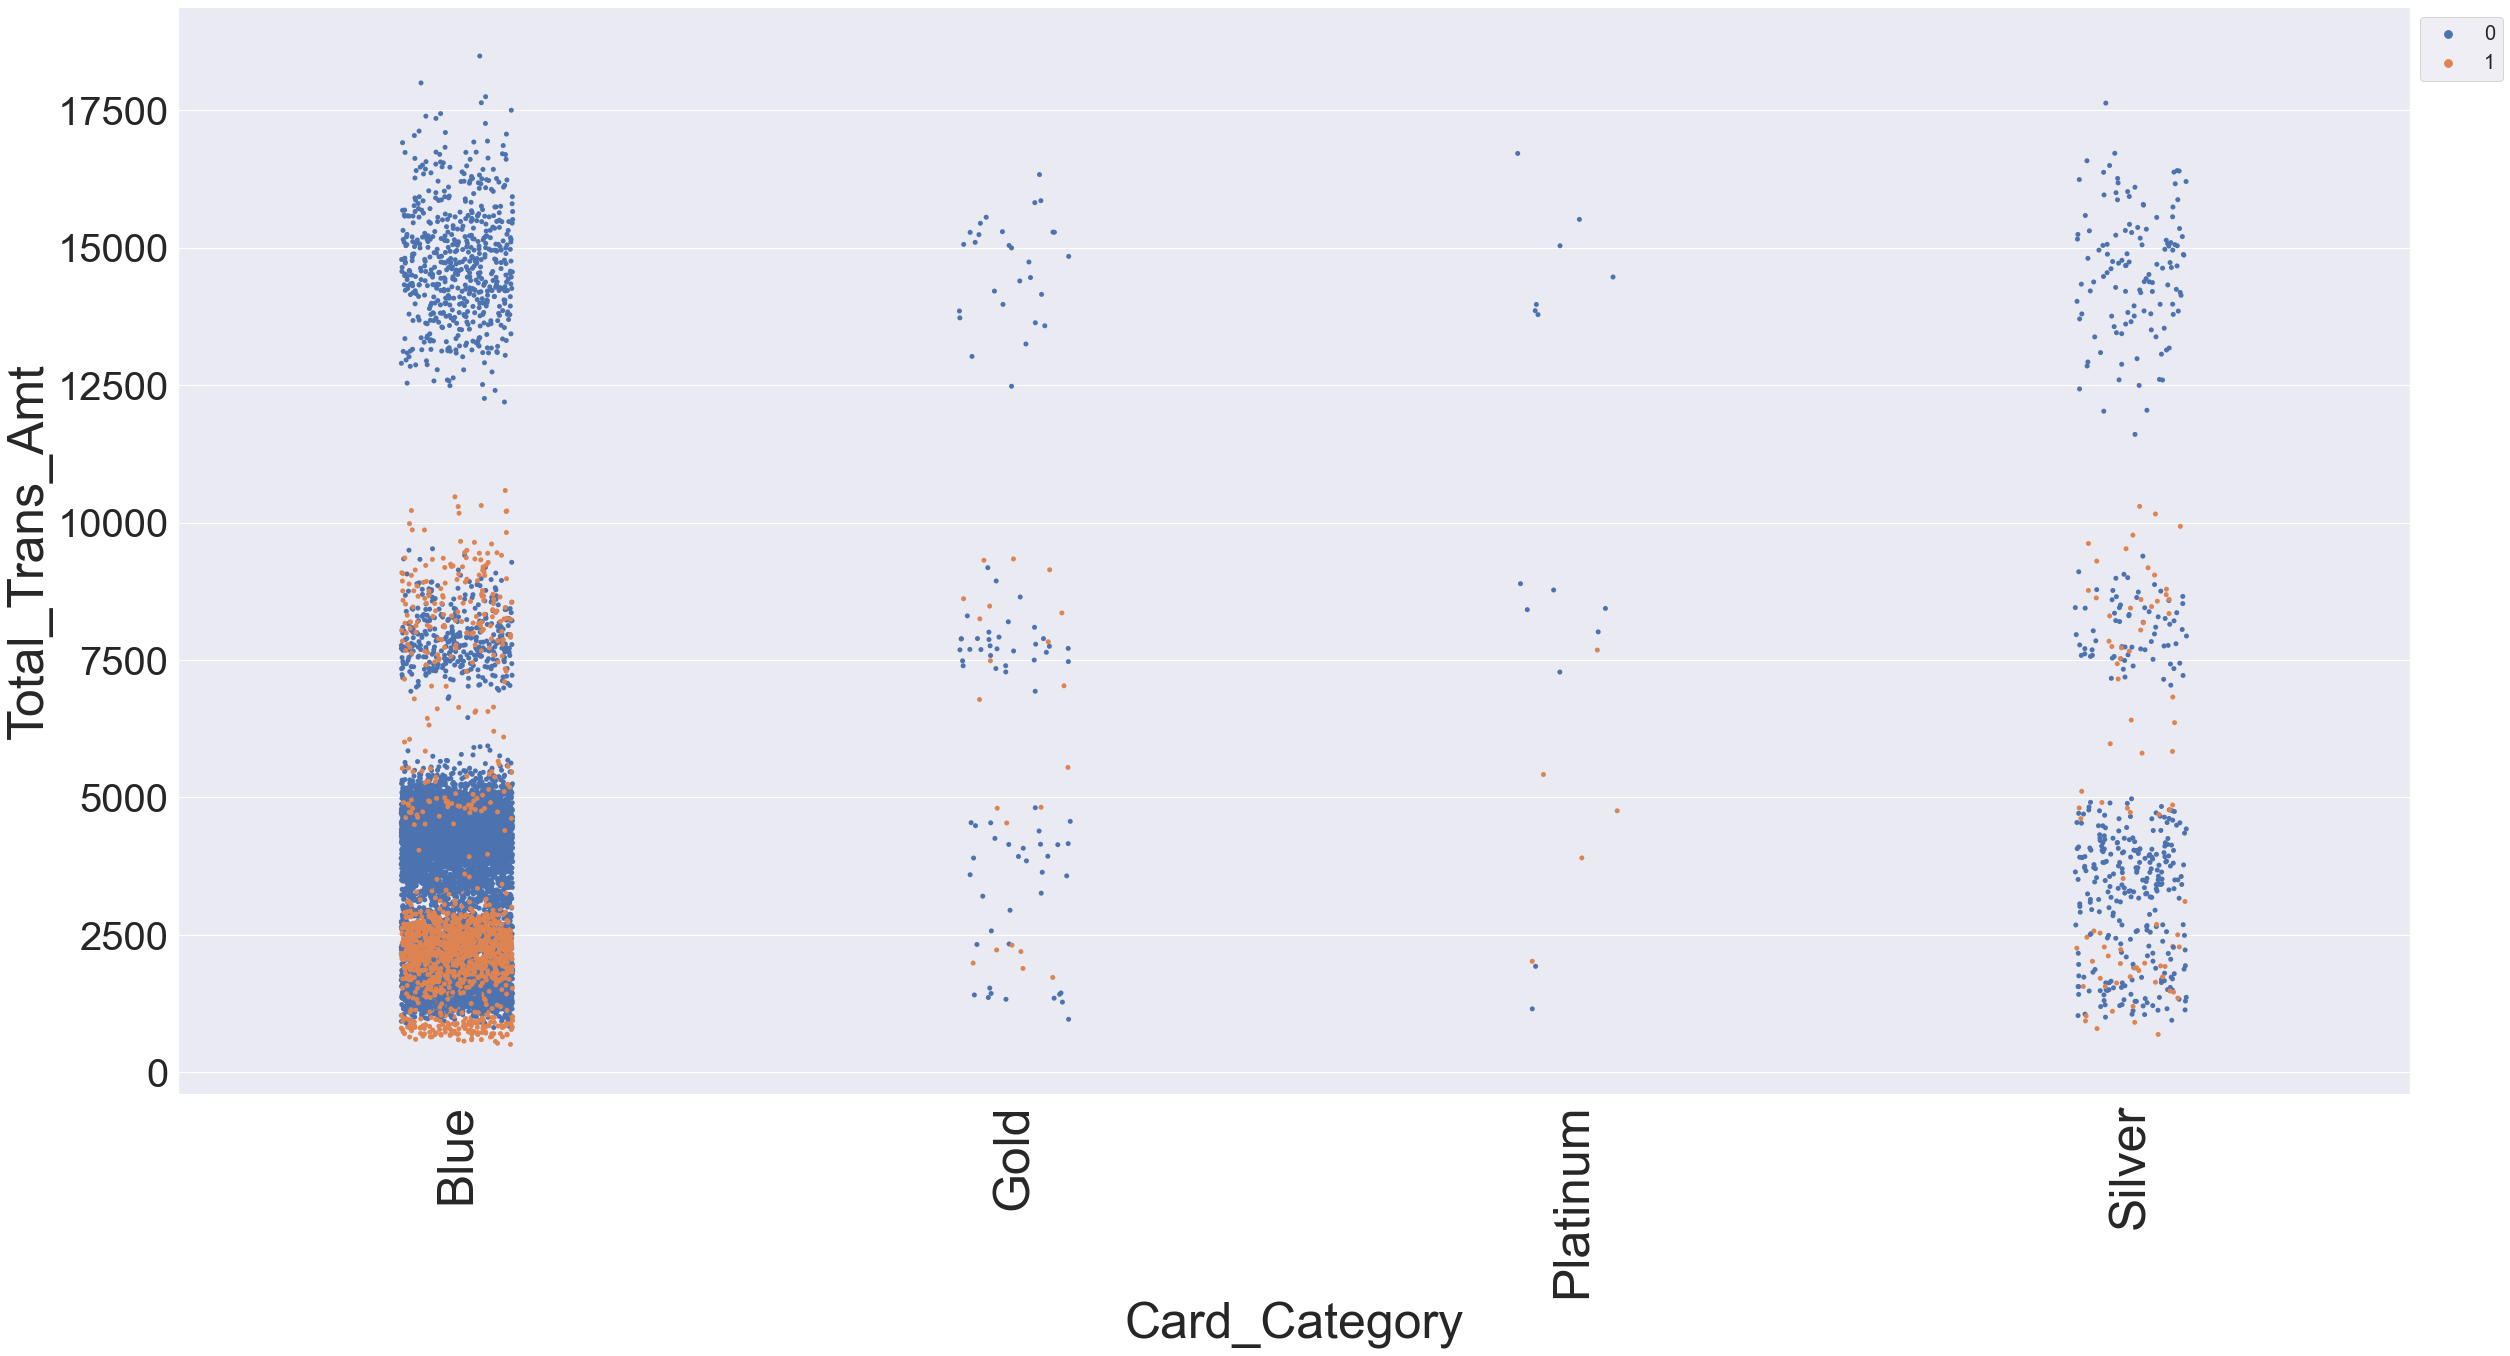

<IPython.core.display.Javascript object>

In [59]:
stripplot_chart(data, "Card_Category", "Total_Trans_Amt", "Attrition_Flag")

- Most of the Attrition_Flag customers are Blue card customers

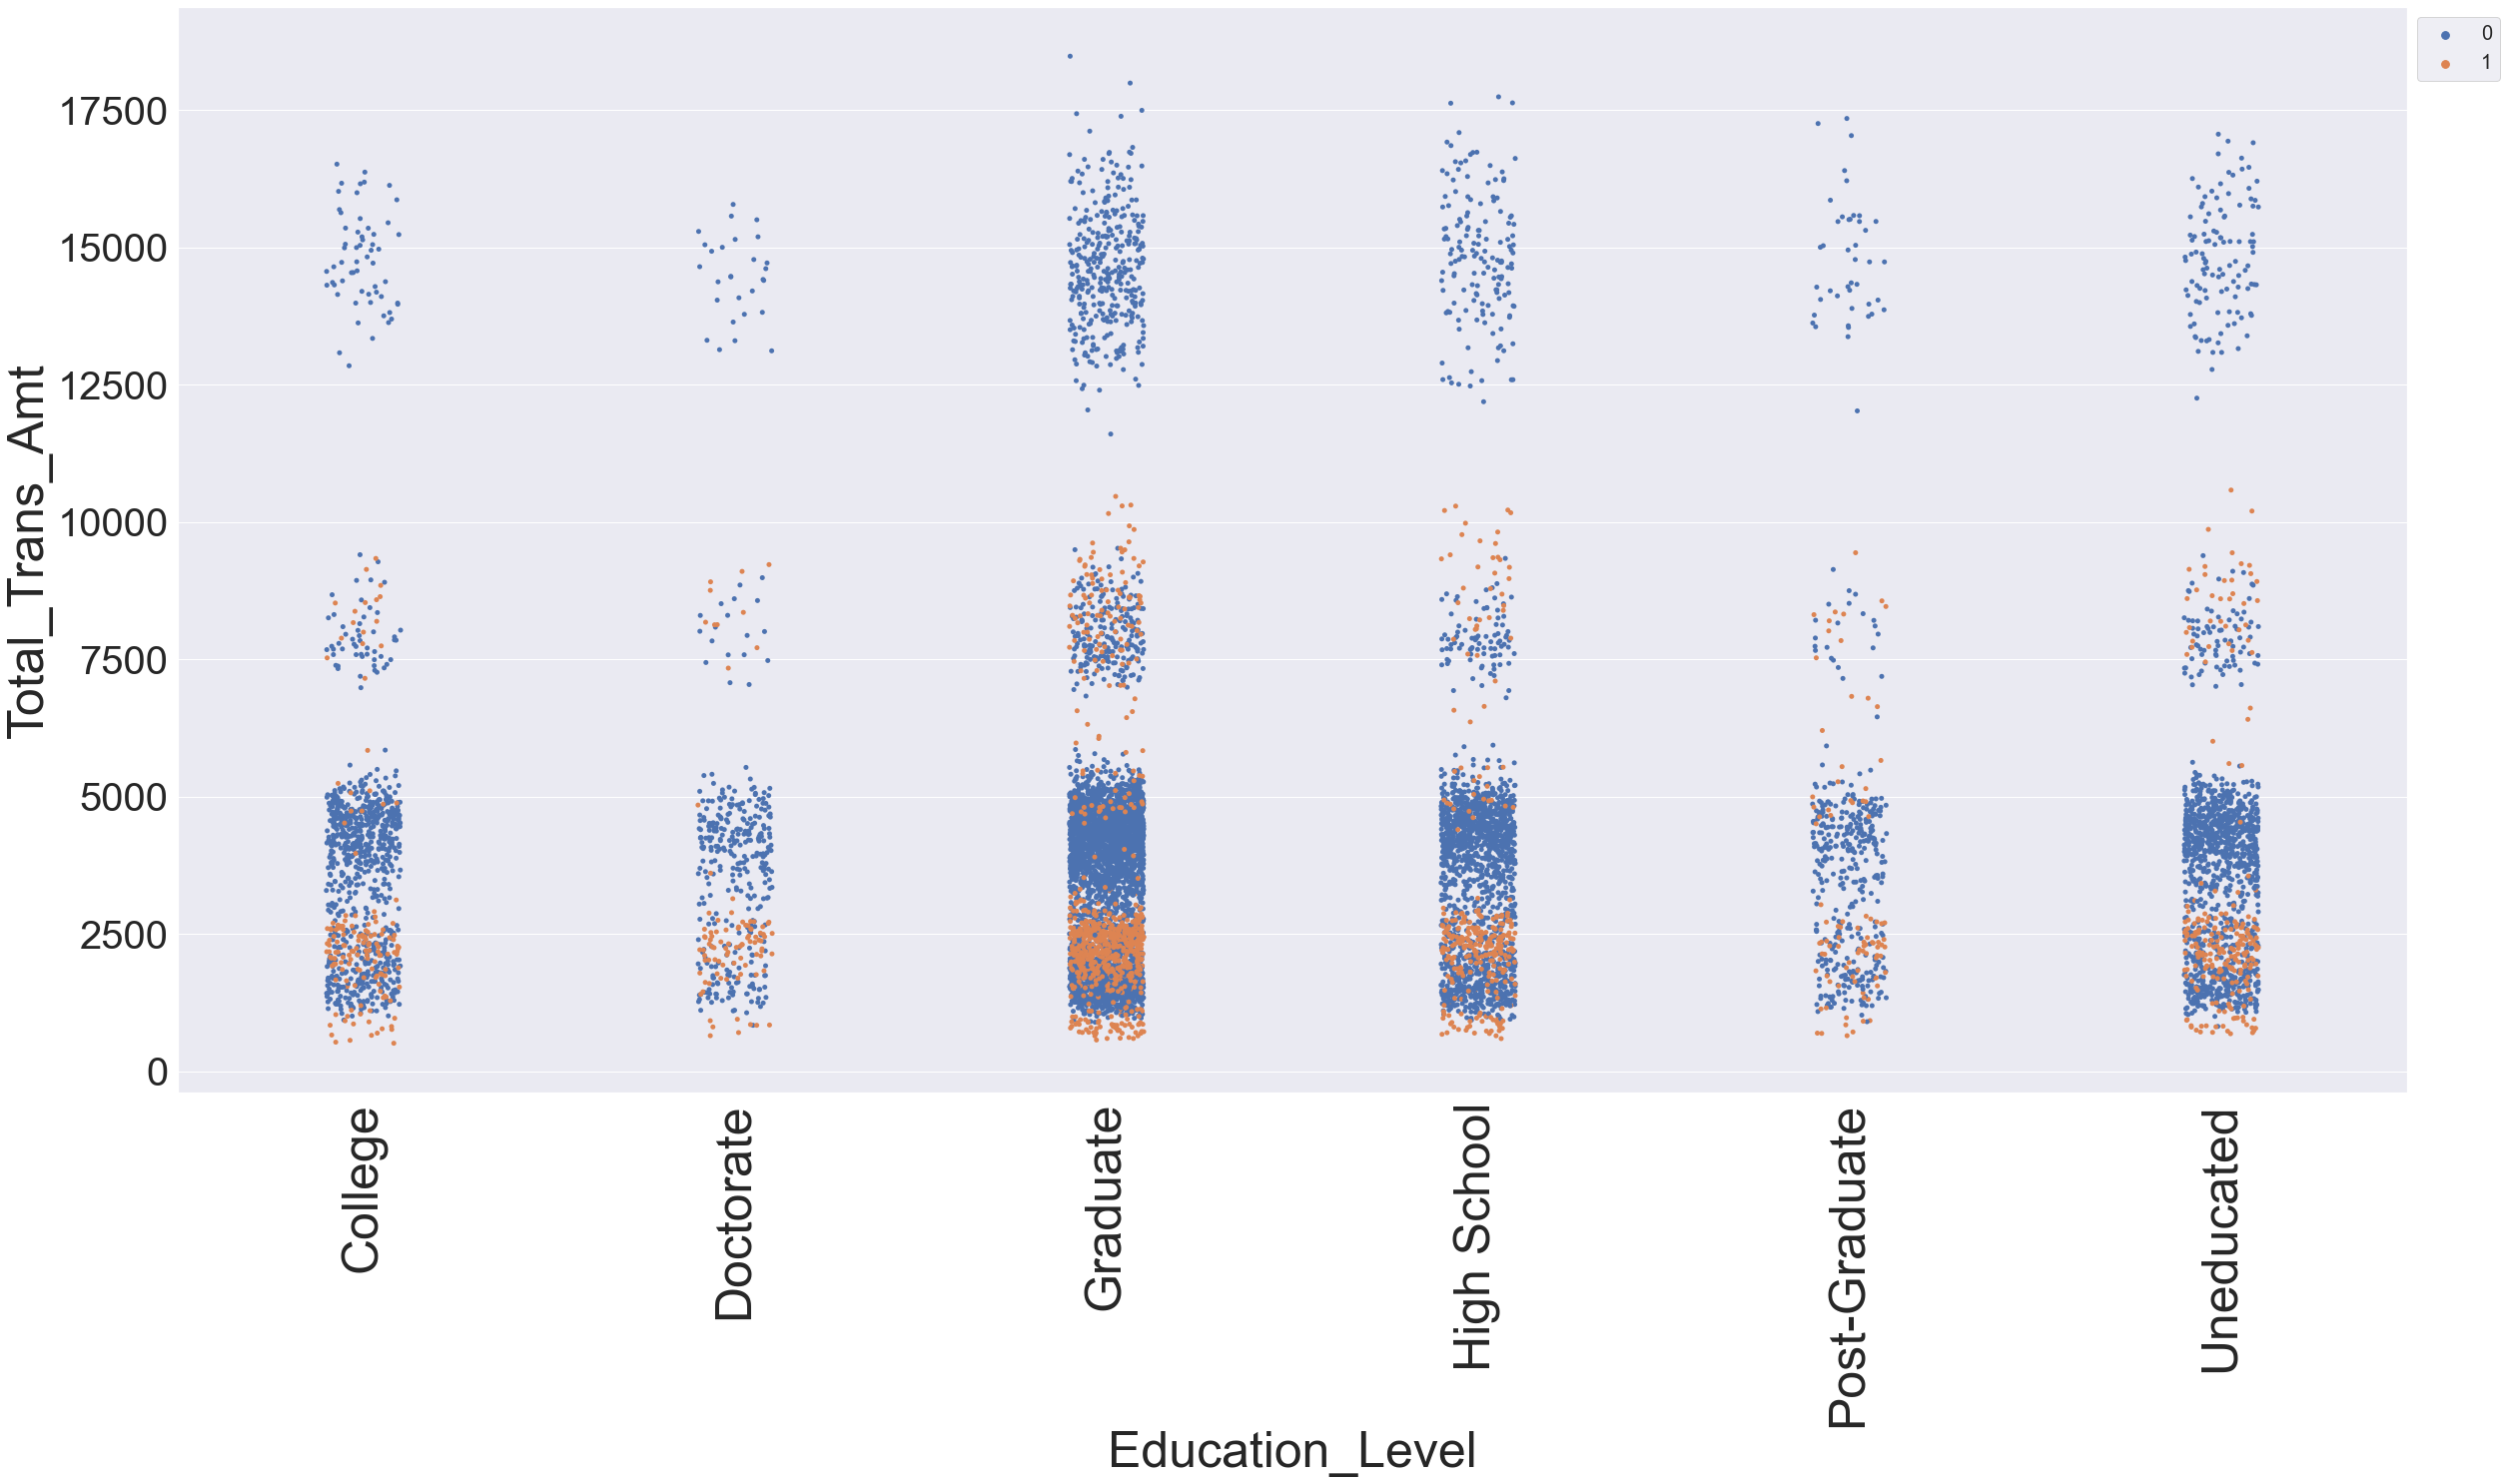

<IPython.core.display.Javascript object>

In [60]:
stripplot_chart(data, "Education_Level", "Total_Trans_Amt", "Attrition_Flag")

- Most of the Attrition_Flag customers are Graduate Education Level

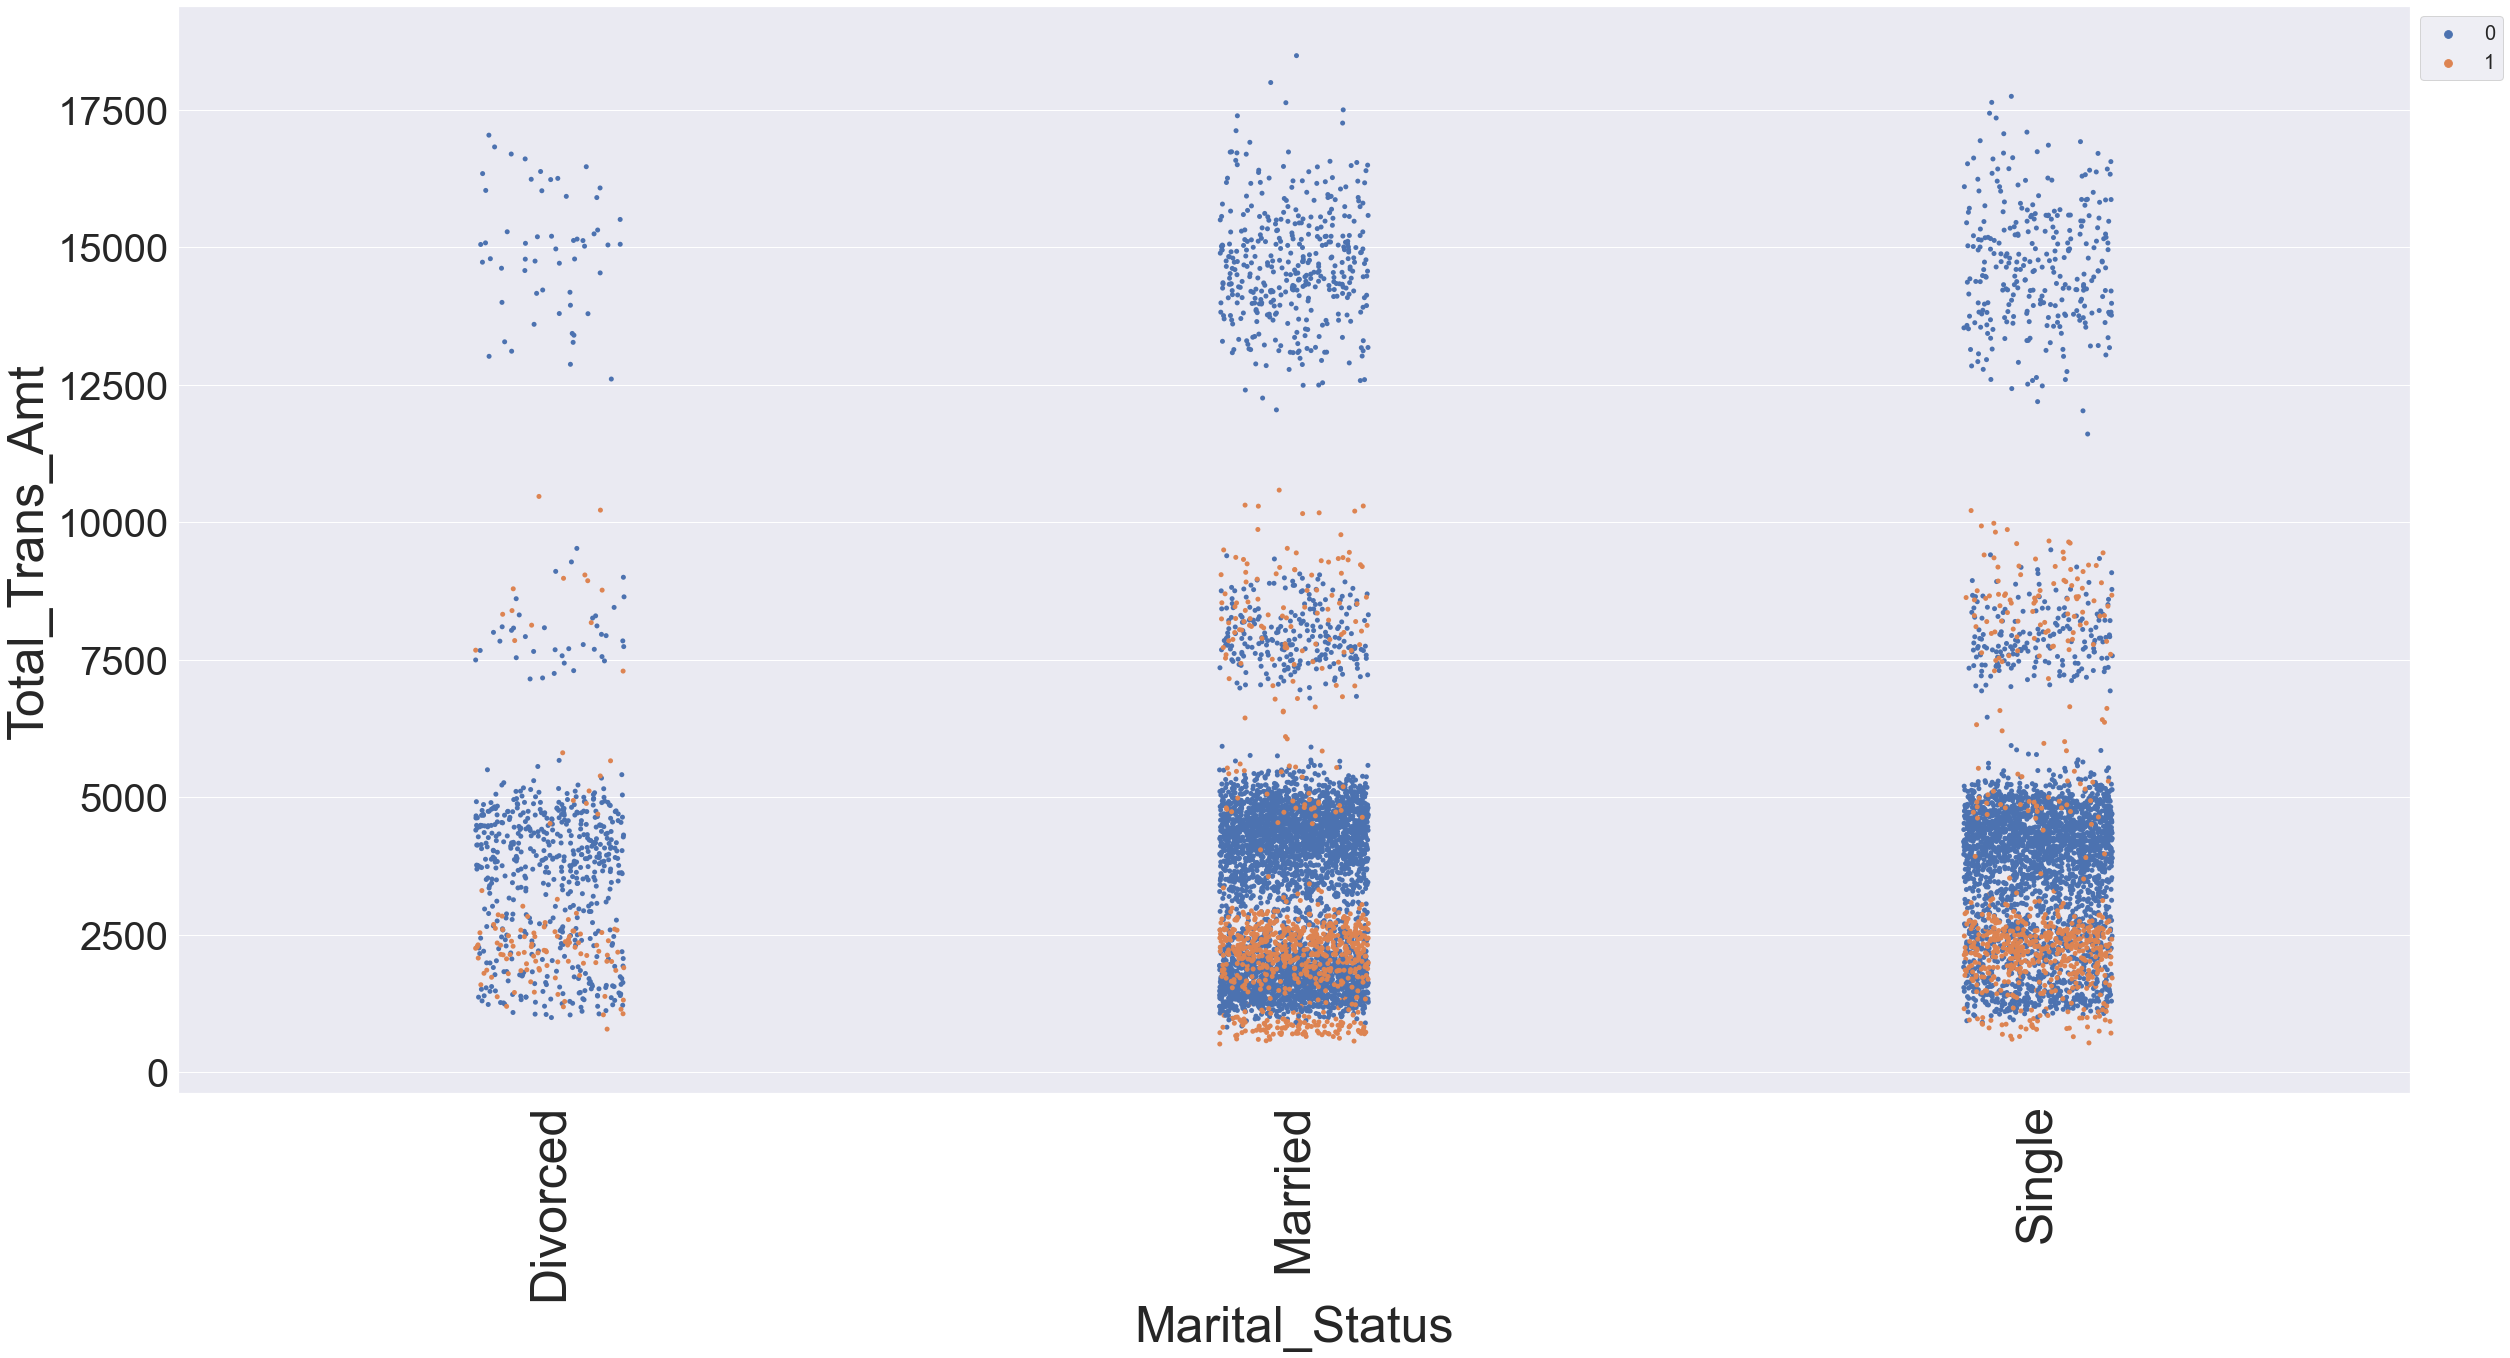

<IPython.core.display.Javascript object>

In [61]:
stripplot_chart(data, "Marital_Status", "Total_Trans_Amt", "Attrition_Flag")

- Married customers are more likely to be Attrition_Flag customers

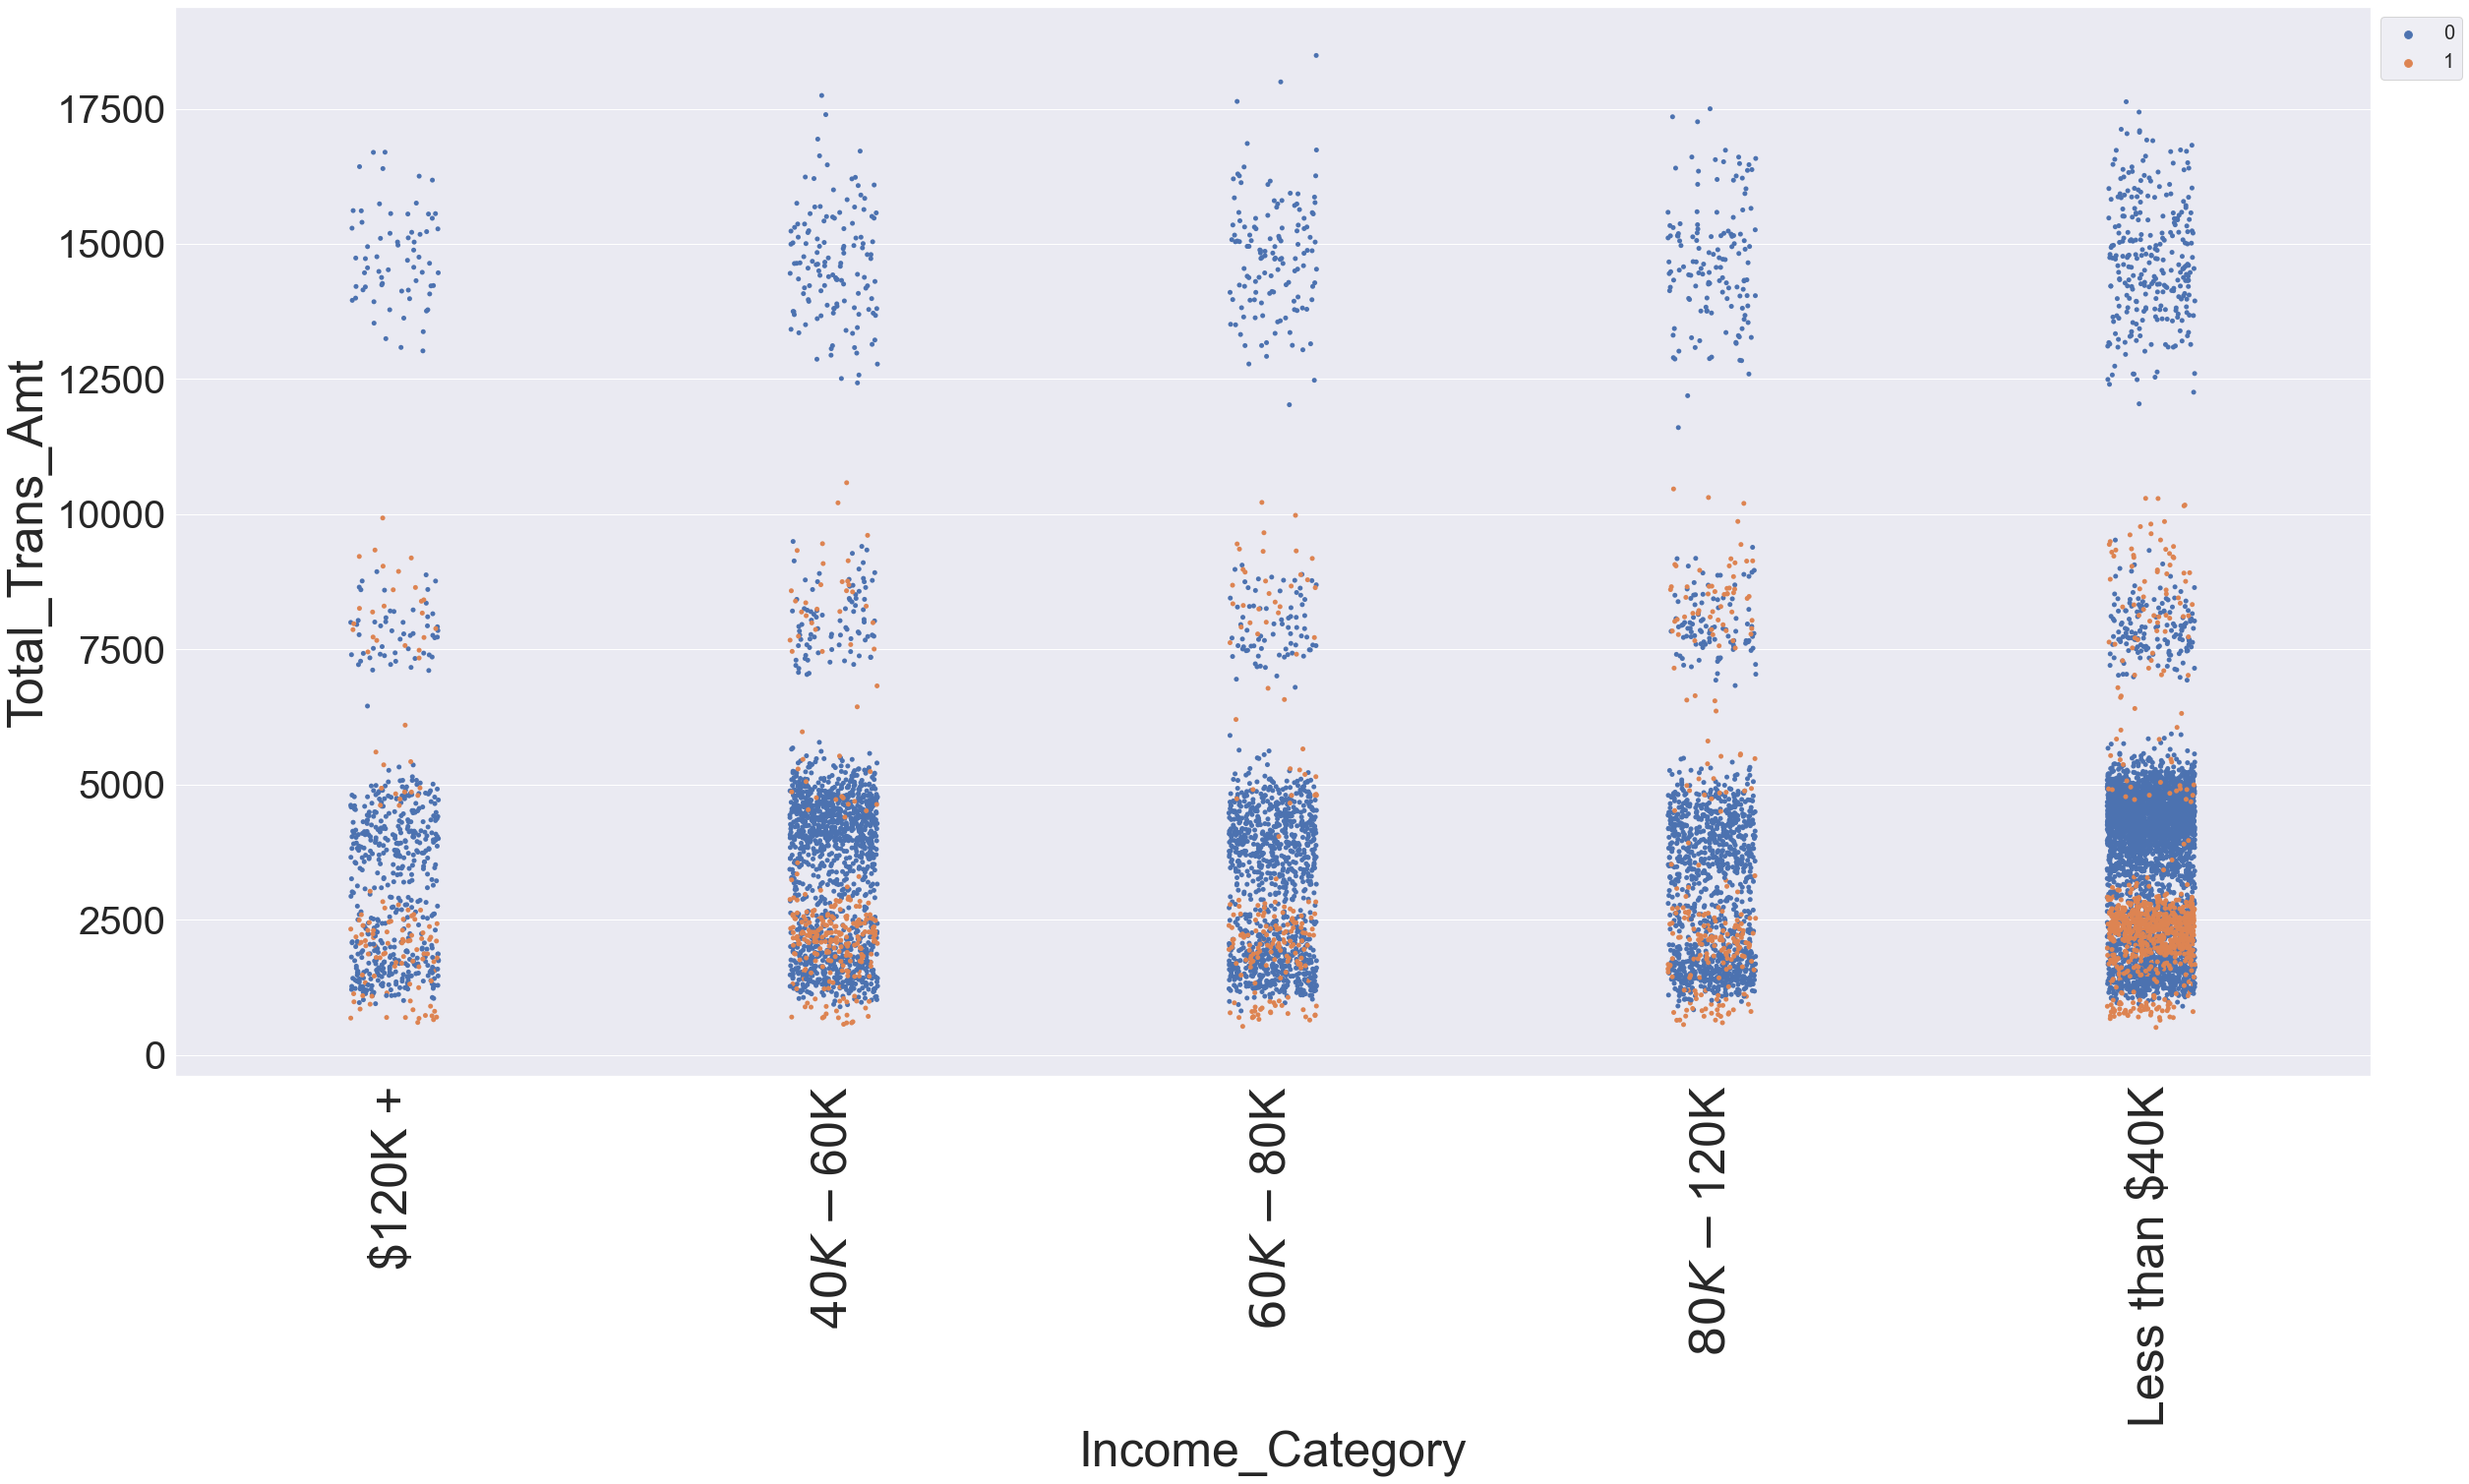

<IPython.core.display.Javascript object>

In [62]:
stripplot_chart(data, "Income_Category", "Total_Trans_Amt", "Attrition_Flag")

- Most of the Attrition_Flag customers are earning an Income of less than 40K

### Key observations on the relationship between variables:

- 16.1% of customers are Attrited
- 83.9% of customers are Existing
- There is a lot more Existing customers compared to target variable Attrited customers
- The Median Age is 46 years old, youngest age is 26 and oldest is 73 years old
- The IQR is between age 41 and 52 with a mean of 46
- There is some outliers in age after 68
- Customer_Age is normal distribution
- 52.9% of the customers are Female
- 47.1% of the customers are Male
- 8.9% of the customers have no dependent
- 18.1% of the customers have only one dependent
- 26.2% of the customers have two dependent
- 27.0% of the customers have three dependent
- 15.5% of the customers have four dependent
- 4.2% of the customers have five dependent
- 10.0% of the customers are going to College
- 4.5% of the customers have a Doctorate degree
- 45.9% of the customers have a Graduate degree
- 19.9% of the customers have a High School diploma
- 5.1% of the customers have a Post-Graduate degree
- 14.7% of the customers are Uneducated
- 7.4% of the customers are Divorced
- 53.7% of the customers are Married
- 38.9% of the customers are Single
- 7.2% of the customers have an Income of more than 120K
- 15.2% of the customers have an Income between 80K - 120K
- 13.8% of the customers have an Income between 60K - 80K
- 17.7% of the customers have an Income between 40K - 60K
- 46.1% of the customers have an Income less than 40K
- 93.2% of the customers have Blue category card
- 5.5% of the customers have Silver category card
- 1.1% of the customers have Gold category card
- 0.2% of the customers have Platinum category card
- The Median is 36 months on the books, ranging from 13 to 56 months on the books
- The IQR is between 31 and 40 months on the books with a mean of 36 months on the books
- There is some outliers in the monthon the books
- Months_on_book is normal distribution
- 9.0% have only one bank product held by the customer
- 12.3% have two bank products held by the customer
- 22.8% have three bank products held by the customer
- 18.9% have four bank products held by the customer
- 18.7% have five bank products held by the customer
- 18.4% have six bank products held by the customer
- 0.3% of the customers had no inactive months in the last 12 months
- 22.0% of the customers had one inactive month in the last 12 months
- 32.4% of the customers had two inactive months in the last 12 months
- 38.0% of the customers had three inactive months in the last 12 months
- 4.3% of the customers had four inactive months in the last 12 months
- 1.8% of the customers had five inactive months in the last 12 months
- 1.2% of the customers had six inactive months in the last 12 months
- 3.9% of the customers had no contacts with the bank in the last 12 months
- 14.8% of the customers had one contact with the bank in the last 12 months
- 31.9% of the customers had two contacts with the bank in the last 12 months
- 33.4% of the customers had three contacts with the bank in the last 12 months
- 13.7% of the customers had four contacts with the bank in the last 12 months
- 1.7% of the customers had five contacts with the bank in the last 12 months
- 0.5% of the customers had six contacts with the bank in the last 12 months
- The Median is 4,549 credit limit, ranging from 1,438 to 34,516 credit limit
- The IQR is between 2,555 and 11,068 credit limit with a mean of 8,632 credit limit
- There is some outliers past 24,000 credit limit
- Credit limit is right skewed
- The Median is 1,276 revolving balance from one month to the next, ranging from 0 to 2,517 revolving balance
- The IQR is between 359 and 1,784 revolving balance from one month to the next with a mean of 1,163 revolving balance
- There is no outliers in revolving balance from one month to the next
- The Median is 3,474 Avg left on the credit card, ranging from 3 to 34,516 Avg left on the credit card
- The IQR is between 1,325 and 9,859 Avg left on the credit card with a mean of 7,469 Avg left on the credit card
- There is some outliers past 24,000 Avg left on the credit card
- Avg left on the credit card (Avg_Open_To_Buy) is right skewed
- The Median is 0.74 ratio change from Q4 and Q1, ranging from 0 to 3.4 ratio change from Q4 and Q1
- The IQR is between 0.63 and 0.86 ratio change from Q4 and Q1 with a mean of 0.76 ratio change from Q4 and Q1
- There is some outliers past 2.5 ratio change from Q4 and Q1
- Ratio change from Q4 and Q1 (Total_Amt_Chng_Q4_Q1) is right skewed
- The Median is 3,899 total transaction amount, ranging from 510 to 18,484 total transaction amount
- The IQR is between 2,156 and 4,741 total transaction amount with a mean of 4,404 total transaction amount
- There is some outliers past 9,000 total transaction amount
- Total transaction amount is right skewed
- The Median is 67 total transaction count, ranging from 10 to 139 total transaction count
- The IQR is between 45 and 81 total transaction count with a mean of 65 total transaction count
- There is some outliers past 134 total transaction count
- Total transaction count is normal distribution
- The Median is 0.7 ratio of total transaction count from Q4 and Q1, ranging from 0 to 3.7 ratio of total transaction count from Q4 and Q1
- The IQR is between 0.6 and 0.8 ratio of total transaction count from Q4 and Q1 with a mean of 0.7 ratio of total transaction count from Q4 and Q1
- There is some outliers past 1.2 ratio of total transaction count from Q4 and Q1
- Ratio of total transaction count from Q4 and Q1 is right skewed
- The Median is 0.18 ratio of avaiable credit the customer spent, ranging from 0 to 1 ratio of avaiable credit the customer spent
- The IQR is between 0.02 and 0.50 ratio of avaiable credit the customer spent with a mean of 0.27 ratio of avaiable credit the customer spent
- There is no outliers in ratio of avaiable credit the customer spent
- Ratio of avaiable credit the customer spent is right skewed
- There is a strong positive correlation between Credit_Limit and Avg_Open_To_Buy
- There is a strong positive correlation between Total_Trans_Amt and Total_Trans_Ct
- There is a strong positive correlation between Months_on_book and Customer_Age
- There is a positive correlation between Total_Revolving_Bal and Avg_Utilization_Ratio
- There is a negitive correlation between Avg_Open_To_Buy and Avg_Utilization_Ratio
- There is a negitive correlation between Credit_Limit and Avg_Utilization_Ratio
- There is a positive correlation between Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1
- There is a negitive correlation between Total_Relationship_Count and Total_Trans_Amt
- There is a negitive correlation between Total_Relationship_Count and Total_Trans_Ct
- There is a small positive correlation between Credit_Limit and Total_Trans_Amt
- There is a small positive correlation between Avg_Open_To_Buy and Total_Trans_Amt
- There is a small negitive correlation between Contacts_Count_12_mon and Total_Trans_Ct
- Attrited Customers have lower Total_Trans_Ct compared to Existing Customers
- Attrited Customers have lower Total_Trans_Amt compared to Existing Customers
- Attrited Customers have lower Total_Ct_Chag_Q4_Q1 compared to Existing Customers
- Attrited Customers have lower Total_Amt_Chag_Q4_Q1 compared to Existing Customers
- Increase in credit limit has a direct correlation to the customers Avg_Open_To_Buy
- The average customer age is equally distributed between Male and Female
- The Education Level is average about the same Customer age across all Education Levels
- Divorced and Married customers have a few outliers in Customer Age
- Single customers have a larger IQR Age range than both Married and Divorced customers
- The higher the Income Category the larger the Credit Limit
- Divorced and Singles have a higher credit limit on average than Married customers
- Education Level has no affect on customer credit limit
- Platinum card customers have the highest credit limit
- Gold card customers have the second highest credit limit
- Silver card customers have the third highest credit limit
- Blue card customers usually have a low credit limit
- Platimum card customers have the highest Total_Trans_Amt
- Blue card customers have the lowest Total_Trans_Amt
- Platimum card customers have the highest Total_Trans_Ct
- Blue card customers have the lowest Total_Trans_Ct
- Most of the Attrition_Flag customers are Blue card customers
- Most of the Attrition_Flag customers are Graduate Education Level
- Married customers are more likely to be Attrition_Flag customers
- Most of the Attrition_Flag customers are earning an Income of less than 40K

# Data Pre-processing

In [63]:
# Create a copy of data and call it "df"
df = data.copy()

<IPython.core.display.Javascript object>

In [64]:
# Create dummies for the County column in the dataset
df = pd.get_dummies(
    df,
    columns=[
        "Gender",
        "Education_Level",
        "Marital_Status",
        "Income_Category",
        "Card_Category",
    ],
    drop_first=True,
)
df.head()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0               0            45                3              39   
1               0            49                5              44   
2               0            51                3              36   
3               0            40                4              34   
4               0            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
0                  0.061         1                          0   
1                  0.105         0                          0   
2                  0.000         1                          0   
3                  0.760         0                          0   
4                  0.000         1                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   

   Marital_Status_Married  Marital_Status_Single  Income_Category_$40K - $60K  \
0                       1                      0                            0   
1                       0                      1                            0   
2                       1                      0                            0   
3                       1                      0                            0   
4                       1                      0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Card_Category_Gold  Card_Category_Platinum  \
0                               0                   0                       0   
1                               1                   0                       0   
2                               0          

<IPython.core.display.Javascript object>

In [65]:
# Information on new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  int64  
 1   Customer_Age                    10127 non-null  int64  
 2   Dependent_count                 10127 non-null  int64  
 3   Months_on_book                  10127 non-null  int64  
 4   Total_Relationship_Count        10127 non-null  int64  
 5   Months_Inactive_12_mon          10127 non-null  int64  
 6   Contacts_Count_12_mon           10127 non-null  int64  
 7   Credit_Limit                    10127 non-null  float64
 8   Total_Revolving_Bal             10127 non-null  int64  
 9   Avg_Open_To_Buy                 10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 11  Total_Trans_Amt                 10127 non-null  int64  
 12  Total_Trans_Ct                  

<IPython.core.display.Javascript object>

# Split Data

In [66]:
# Split into X=Predictor and Y=Predicted
X = df.drop("Attrition_Flag", axis=1)
y = df["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [67]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=5, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(6480, 29) (1621, 29) (2026, 29)


<IPython.core.display.Javascript object>

- Training set is 6,480 rows and 29 columns
- Validation set is 1,621 rows and 29 columns
- Test set is 2,026 rows and 29 columns

In [68]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 50)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 50)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 50)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 50)

Target value ratio in y
0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64
**************************************************
Target value ratio in y_train
0    0.839352
1    0.160648
Name: Attrition_Flag, dtype: float64
**************************************************
Target value ratio in y_val
0    0.838988
1    0.161012
Name: Attrition_Flag, dtype: float64
**************************************************
Target value ratio in y_test
0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64
**************************************************


<IPython.core.display.Javascript object>

In [69]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

# Model Building

## Logistic Regression Model

In [70]:
# Fit the logistic regression model on train set
lr = LogisticRegression(solver="newton-cg", random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

<IPython.core.display.Javascript object>

### Checking Logistic Regression model performance on training dataset

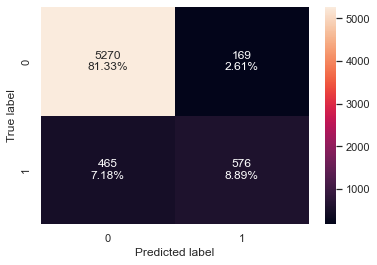

<IPython.core.display.Javascript object>

In [71]:
# Showing the confusion matrix on the logistic regression model dataset
confusion_matrix_sklearn(lr, X_train, y_train)

In [72]:
# Show model performance on the logistic regression model dataset
lr_model_train_perf = model_performance_classification_sklearn(lr, X_train, y_train)
lr_model_train_perf

Accuracy    Recall  Precision        F1
0   0.90216  0.553314   0.773154  0.645017

<IPython.core.display.Javascript object>

### Checking Logistic Regression model performance on validation dataset

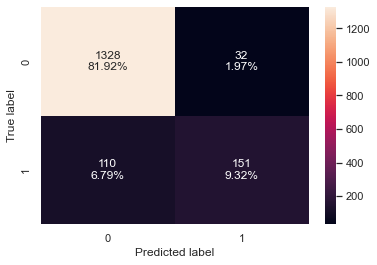

<IPython.core.display.Javascript object>

In [73]:
# Showing the confusion matrix on the logistic regression model dataset
confusion_matrix_sklearn(lr, X_val, y_val)

In [74]:
# Show model performance on the logistic regression model dataset
lr_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
lr_model_val_perf

Accuracy    Recall  Precision       F1
0    0.9124  0.578544   0.825137  0.68018

<IPython.core.display.Javascript object>

## Bagging Classifier Model

In [75]:
# create the Bagging Classifier model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking Bagging Classifier model performance on training dataset

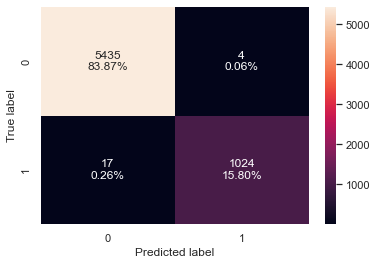

<IPython.core.display.Javascript object>

In [76]:
# Showing the confusion matrix on the Bagging train dataset
confusion_matrix_sklearn(bagging, X_train, y_train)

In [77]:
# Show model performance on the Bagging training dataset
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)
bagging_model_train_perf

Accuracy   Recall  Precision       F1
0  0.996759  0.98367   0.996109  0.98985

<IPython.core.display.Javascript object>

### Checking Bagging Classifier model performance on validation dataset

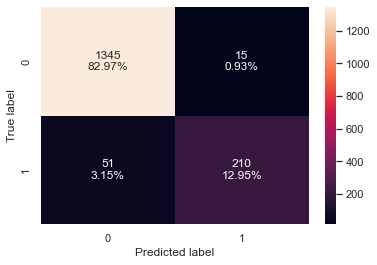

<IPython.core.display.Javascript object>

In [78]:
# Showing the confusion matrix on the Bagging validation dataset
confusion_matrix_sklearn(bagging, X_val, y_val)

In [79]:
# Show model performance on the Bagging validation dataset
bagging_model_val_perf = model_performance_classification_sklearn(bagging, X_val, y_val)
bagging_model_val_perf

Accuracy    Recall  Precision        F1
0  0.959284  0.804598   0.933333  0.864198

<IPython.core.display.Javascript object>

## Random Forest Model

In [80]:
# create the Random Forest model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking Random Forest model performance on training dataset

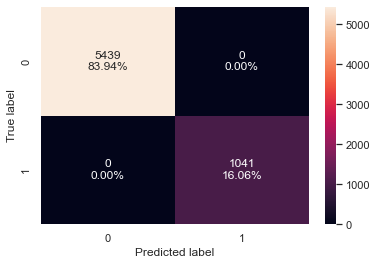

<IPython.core.display.Javascript object>

In [81]:
# Showing the confusion matrix on the Random Forest train dataset
confusion_matrix_sklearn(rf, X_train, y_train)

In [82]:
# Show model performance on the Random Forest training dataset
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
rf_model_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

### Checking Random Forest model performance on validation dataset

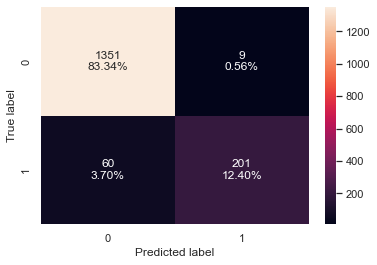

<IPython.core.display.Javascript object>

In [83]:
# Showing the confusion matrix on the Random Forest validation dataset
confusion_matrix_sklearn(rf, X_val, y_val)

In [84]:
# Show model performance on the Random Forest validation dataset
rf_model_val_perf = model_performance_classification_sklearn(rf, X_val, y_val)
rf_model_val_perf

Accuracy    Recall  Precision        F1
0  0.957434  0.770115   0.957143  0.853503

<IPython.core.display.Javascript object>

## Decision Tree Model

In [85]:
# Creating the Decision Tree Model
dtree = DecisionTreeClassifier(criterion="gini", random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking Decision Tree model performance on training dataset

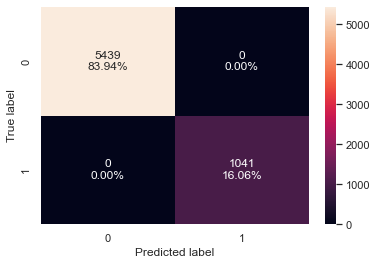

<IPython.core.display.Javascript object>

In [86]:
# Showing the confusion matrix on the Decision Tree train dataset
confusion_matrix_sklearn(dtree, X_train, y_train)

In [87]:
# Show model performance on the Decision Tree training dataset
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
dtree_model_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

### Checking Decision Tree model performance on validation dataset

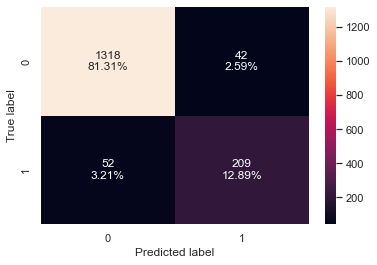

<IPython.core.display.Javascript object>

In [88]:
# Showing the confusion matrix on the Decision Tree validation dataset
confusion_matrix_sklearn(dtree, X_val, y_val)

In [89]:
# Show model performance on the Decision Tree validation dataset
dtree_model_val_perf = model_performance_classification_sklearn(dtree, X_val, y_val)
dtree_model_val_perf

Accuracy    Recall  Precision        F1
0  0.942011  0.800766   0.832669  0.816406

<IPython.core.display.Javascript object>

## AdaBoost Model

In [90]:
# Creating the AdaBoost Model
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking AdaBoost model performance on training dataset

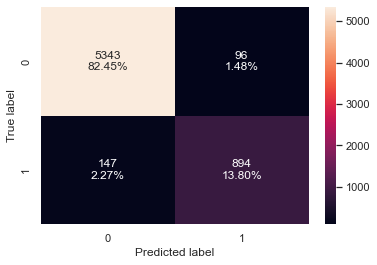

<IPython.core.display.Javascript object>

In [91]:
# Showing the confusion matrix on the AdaBoost train dataset
confusion_matrix_sklearn(abc, X_train, y_train)

In [92]:
# Show model performance on the AdaBoost train dataset
abc_model_train_perf = model_performance_classification_sklearn(abc, X_train, y_train)
abc_model_train_perf

Accuracy   Recall  Precision        F1
0    0.9625  0.85879    0.90303  0.880355

<IPython.core.display.Javascript object>

### Checking AdaBoost model performance on validation dataset

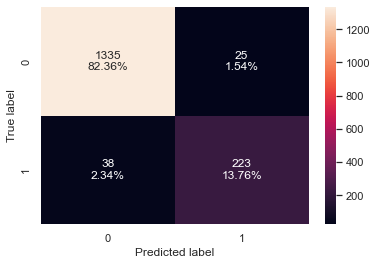

<IPython.core.display.Javascript object>

In [93]:
# Showing the confusion matrix on the AdaBoost validation dataset
confusion_matrix_sklearn(abc, X_val, y_val)

In [94]:
# Show model performance on the AdaBoost validation dataset
abc_model_val_perf = model_performance_classification_sklearn(abc, X_val, y_val)
abc_model_val_perf

Accuracy    Recall  Precision        F1
0  0.961135  0.854406   0.899194  0.876228

<IPython.core.display.Javascript object>

## GradientBoost Model

In [95]:
# Creating the GradientBoost Model
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking GradientBoost model performance on training dataset

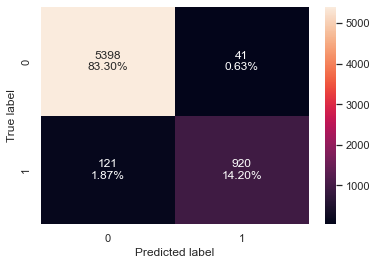

<IPython.core.display.Javascript object>

In [96]:
# Showing the confusion matrix on the GradientBoost train dataset
confusion_matrix_sklearn(gbc, X_train, y_train)

In [97]:
# Show model performance on the GradientBoost train dataset
gbc_model_train_perf = model_performance_classification_sklearn(gbc, X_train, y_train)
gbc_model_train_perf

Accuracy    Recall  Precision        F1
0     0.975  0.883766   0.957336  0.919081

<IPython.core.display.Javascript object>

### Checking GradientBoost model performance on validation dataset

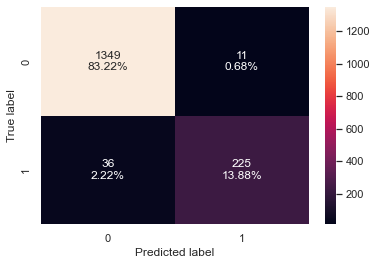

<IPython.core.display.Javascript object>

In [98]:
# Showing the confusion matrix on the GradientBoost validation dataset
confusion_matrix_sklearn(gbc, X_val, y_val)

In [99]:
# Show model performance on the GradientBoost validation dataset
gbc_model_val_perf = model_performance_classification_sklearn(gbc, X_val, y_val)
gbc_model_val_perf

Accuracy    Recall  Precision        F1
0  0.971006  0.862069    0.95339  0.905433

<IPython.core.display.Javascript object>

## XGBoost Model

In [100]:
# Creating the XGBoost Model
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

### Checking XGBoost model performance on training dataset

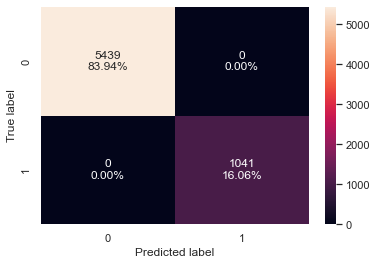

<IPython.core.display.Javascript object>

In [101]:
# Showing the confusion matrix on the XGBoost train dataset
confusion_matrix_sklearn(xgb, X_train, y_train)

In [102]:
# Show model performance on the XGBoost train dataset
xgb_model_train_perf = model_performance_classification_sklearn(xgb, X_train, y_train)
xgb_model_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

### Checking XGBoost model performance on validation dataset

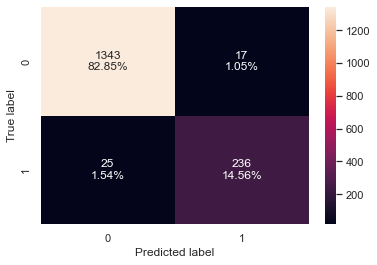

<IPython.core.display.Javascript object>

In [103]:
# Showing the confusion matrix on the XGBoost validation dataset
confusion_matrix_sklearn(xgb, X_val, y_val)

In [104]:
# Show model performance on the XGBoost validation dataset
xgb_model_val_perf = model_performance_classification_sklearn(xgb, X_val, y_val)
xgb_model_val_perf

Accuracy    Recall  Precision        F1
0   0.97409  0.904215   0.932806  0.918288

<IPython.core.display.Javascript object>

## Comparing all the models

In [105]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        lr_model_train_perf.T,
        bagging_model_train_perf.T,
        rf_model_train_perf.T,
        dtree_model_train_perf.T,
        abc_model_train_perf.T,
        gbc_model_train_perf.T,
        xgb_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Decision Tree",
    "Adaptive Boosting",
    "Gradient Boosting",
    "Extreme Gradient Boosting",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression  Bagging Classifier  Random Forest Classifier  \
Accuracy              0.902160            0.996759                       1.0   
Recall                0.553314            0.983670                       1.0   
Precision             0.773154            0.996109                       1.0   
F1                    0.645017            0.989850                       1.0   

           Decision Tree  Adaptive Boosting  Gradient Boosting  \
Accuracy             1.0           0.962500           0.975000   
Recall               1.0           0.858790           0.883766   
Precision            1.0           0.903030           0.957336   
F1                   1.0           0.880355           0.919081   

           Extreme Gradient Boosting  
Accuracy                         1.0  
Recall                           1.0  
Precision                        1.0  
F1                               1.0

<IPython.core.display.Javascript object>

In [106]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        lr_model_val_perf.T,
        bagging_model_val_perf.T,
        rf_model_val_perf.T,
        dtree_model_val_perf.T,
        abc_model_val_perf.T,
        gbc_model_val_perf.T,
        xgb_model_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Logistic Regression",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Decision Tree",
    "Adaptive Boosting",
    "Gradient Boosting",
    "Extreme Gradient Boosting",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Logistic Regression  Bagging Classifier  Random Forest Classifier  \
Accuracy              0.912400            0.959284                  0.957434   
Recall                0.578544            0.804598                  0.770115   
Precision             0.825137            0.933333                  0.957143   
F1                    0.680180            0.864198                  0.853503   

           Decision Tree  Adaptive Boosting  Gradient Boosting  \
Accuracy        0.942011           0.961135           0.971006   
Recall          0.800766           0.854406           0.862069   
Precision       0.832669           0.899194           0.953390   
F1              0.816406           0.876228           0.905433   

           Extreme Gradient Boosting  
Accuracy                    0.974090  
Recall                      0.904215  
Precision                   0.932806  
F1                          0.918288

<IPython.core.display.Javascript object>

# Model Building - Oversampled data

## Oversampling train data using SMOTE

In [107]:
print(
    "Before Oversampling, counts of Attrition_Flag 'Yes': {}".format(sum(y_train == 1))
)
print(
    "Before Oversampling, counts of Attrition_Flag 'No': {} \n".format(
        sum(y_train == 0)
    )
)

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print(
    "After Oversampling, counts of Attrition_Flag 'Yes': {}".format(
        sum(y_train_over == 1)
    )
)
print(
    "After Oversampling, counts of Attrition_Flag 'No': {} \n".format(
        sum(y_train_over == 0)
    )
)


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of Attrition_Flag 'Yes': 1041
Before Oversampling, counts of Attrition_Flag 'No': 5439 

After Oversampling, counts of Attrition_Flag 'Yes': 5439
After Oversampling, counts of Attrition_Flag 'No': 5439 

After Oversampling, the shape of train_X: (10878, 29)
After Oversampling, the shape of train_y: (10878,) 



<IPython.core.display.Javascript object>

## Logistic Regression Model on oversampled data

In [108]:
# Fit the logistic regression model on oversampled train set
lr_over = LogisticRegression(solver="newton-cg", random_state=1)
lr_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1, solver='newton-cg')

<IPython.core.display.Javascript object>

### Checking Logistic Regression model performance on oversampled training dataset

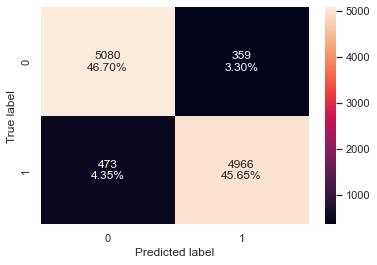

<IPython.core.display.Javascript object>

In [109]:
# Showing the confusion matrix on the logistic regression model on oversampled dataset
confusion_matrix_sklearn(lr_over, X_train_over, y_train_over)

In [110]:
# Show model performance on the logistic regression model on oversampled dataset
lr_over_model_train_perf = model_performance_classification_sklearn(
    lr_over, X_train_over, y_train_over
)
lr_over_model_train_perf

Accuracy    Recall  Precision        F1
0  0.923515  0.913035   0.932582  0.922705

<IPython.core.display.Javascript object>

### Checking Logistic Regression model performance on oversampled validation dataset

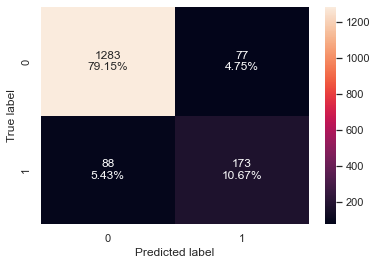

<IPython.core.display.Javascript object>

In [111]:
# Showing the confusion matrix on the logistic regression model on oversampled dataset
confusion_matrix_sklearn(lr_over, X_val, y_val)

In [112]:
# Show model performance on the logistic regression model on oversampled dataset
lr_over_model_val_perf = model_performance_classification_sklearn(lr_over, X_val, y_val)
lr_over_model_val_perf

Accuracy    Recall  Precision        F1
0  0.898211  0.662835      0.692  0.677104

<IPython.core.display.Javascript object>

## Bagging Classifier Model on oversampled data

In [113]:
# create the Bagging Classifier model on oversampled data
bagging_over = BaggingClassifier(random_state=1)
bagging_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking Bagging Classifier model performance on oversampled training dataset

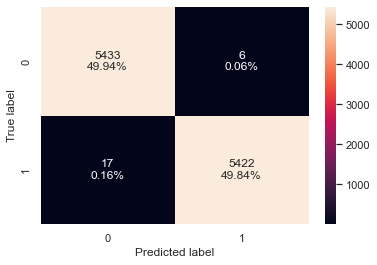

<IPython.core.display.Javascript object>

In [114]:
# Showing the confusion matrix on the bagging classifier model on oversampled dataset
confusion_matrix_sklearn(bagging_over, X_train_over, y_train_over)

In [115]:
# Show model performance on the bagging classifier model on oversampled dataset
bagging_over_model_train_perf = model_performance_classification_sklearn(
    bagging_over, X_train_over, y_train_over
)
bagging_over_model_train_perf

Accuracy    Recall  Precision        F1
0  0.997886  0.996874   0.998895  0.997884

<IPython.core.display.Javascript object>

### Checking Bagging Classifier model performance on oversampled validation dataset

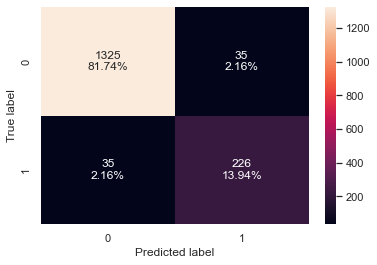

<IPython.core.display.Javascript object>

In [116]:
# Showing the confusion matrix on the bagging classifier model on oversampled dataset
confusion_matrix_sklearn(bagging_over, X_val, y_val)

In [117]:
# Show model performance on the bagging classifier model on oversampled dataset
bagging_over_model_val_perf = model_performance_classification_sklearn(
    bagging_over, X_val, y_val
)
bagging_over_model_val_perf

Accuracy  Recall  Precision      F1
0  0.956817  0.8659     0.8659  0.8659

<IPython.core.display.Javascript object>

## Random Forest Model on oversampled data

In [118]:
# create the Random Forest model on oversampled data
rf_over = RandomForestClassifier(random_state=1)
rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking Random Forest model performance on oversampled training dataset

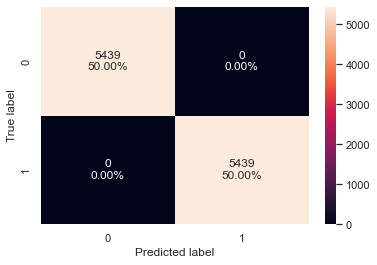

<IPython.core.display.Javascript object>

In [119]:
# Showing the confusion matrix on the Random Forest model on oversampled dataset
confusion_matrix_sklearn(rf_over, X_train_over, y_train_over)

In [120]:
# Show model performance on the Random Forest model on oversampled dataset
rf_over_model_train_perf = model_performance_classification_sklearn(
    rf_over, X_train_over, y_train_over
)
rf_over_model_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

### Checking Random Forest model performance on oversampled validation dataset

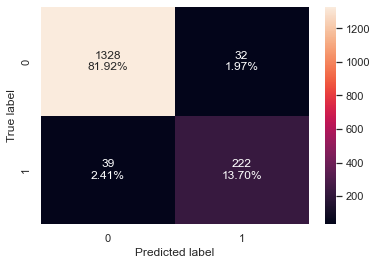

<IPython.core.display.Javascript object>

In [121]:
# Showing the confusion matrix on the Random Forest model on oversampled dataset
confusion_matrix_sklearn(rf_over, X_val, y_val)

In [122]:
# Show model performance on the Random Forest model on oversampled dataset
rf_over_model_val_perf = model_performance_classification_sklearn(rf_over, X_val, y_val)
rf_over_model_val_perf

Accuracy    Recall  Precision        F1
0    0.9562  0.850575   0.874016  0.862136

<IPython.core.display.Javascript object>

## Decision Tree Model on oversampled data

In [123]:
# Creating the Decision Tree Model on oversampled data
dtree_over = DecisionTreeClassifier(criterion="gini", random_state=1)
dtree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking Decision Tree model performance on oversampled training dataset

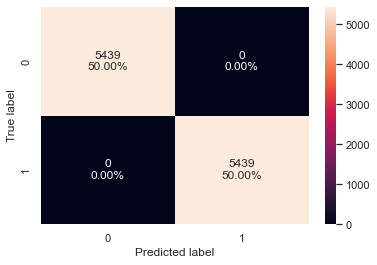

<IPython.core.display.Javascript object>

In [124]:
# Showing the confusion matrix on the Decision Tree model on oversampled dataset
confusion_matrix_sklearn(dtree_over, X_train_over, y_train_over)

In [125]:
# Show model performance on the Decision Tree model on oversampled dataset
dtree_over_model_train_perf = model_performance_classification_sklearn(
    dtree_over, X_train_over, y_train_over
)
dtree_over_model_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

### Checking Decision Tree model performance on oversampled validation dataset

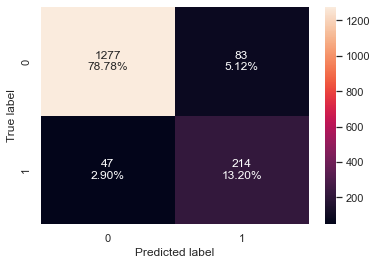

<IPython.core.display.Javascript object>

In [126]:
# Showing the confusion matrix on the Decision Tree model on oversampled dataset
confusion_matrix_sklearn(dtree_over, X_val, y_val)

In [127]:
# Show model performance on the Decision Tree model on oversampled dataset
dtree_over_model_val_perf = model_performance_classification_sklearn(
    dtree_over, X_val, y_val
)
dtree_over_model_val_perf

Accuracy    Recall  Precision        F1
0  0.919803  0.819923   0.720539  0.767025

<IPython.core.display.Javascript object>

## AdaBoost Model on oversampled data

In [128]:
# Creating the AdaBoost Model on oversampled data
abc_over = AdaBoostClassifier(random_state=1)
abc_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking AdaBoost model performance on oversampled training dataset

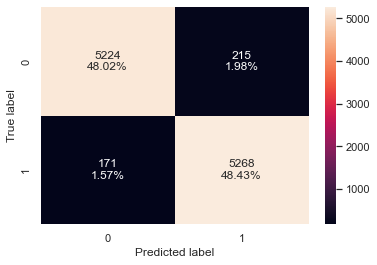

<IPython.core.display.Javascript object>

In [129]:
# Showing the confusion matrix on the AdaBoost model on oversampled dataset
confusion_matrix_sklearn(abc_over, X_train_over, y_train_over)

In [130]:
# Show model performance on the AdaBoost model on oversampled dataset
abc_over_model_train_perf = model_performance_classification_sklearn(
    abc_over, X_train_over, y_train_over
)
abc_over_model_train_perf

Accuracy   Recall  Precision        F1
0  0.964516  0.96856   0.960788  0.964658

<IPython.core.display.Javascript object>

### Checking AdaBoost model performance on oversampled validation dataset

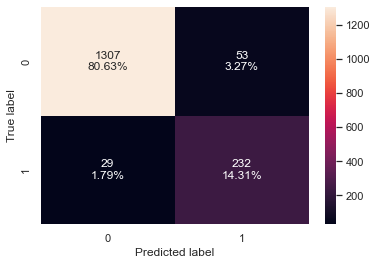

<IPython.core.display.Javascript object>

In [131]:
# Showing the confusion matrix on the AdaBoost model on oversampled dataset
confusion_matrix_sklearn(abc_over, X_val, y_val)

In [132]:
# Show model performance on the AdaBoost model on oversampled dataset
abc_over_model_val_perf = model_performance_classification_sklearn(
    abc_over, X_val, y_val
)
abc_over_model_val_perf

Accuracy    Recall  Precision        F1
0  0.949414  0.888889   0.814035  0.849817

<IPython.core.display.Javascript object>

## GradientBoost Model on oversampled data

In [133]:
# Creating the GradientBoost Model on oversampled data
gbc_over = GradientBoostingClassifier(random_state=1)
gbc_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking GradientBoost model performance on oversampled training dataset

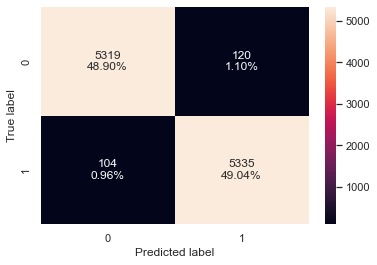

<IPython.core.display.Javascript object>

In [134]:
# Showing the confusion matrix on the GradientBoost model on oversampled dataset
confusion_matrix_sklearn(gbc_over, X_train_over, y_train_over)

In [135]:
# Show model performance on the GradientBoost model on oversampled dataset
gbc_over_model_train_perf = model_performance_classification_sklearn(
    gbc_over, X_train_over, y_train_over
)
gbc_over_model_train_perf

Accuracy    Recall  Precision        F1
0  0.979408  0.980879   0.978002  0.979438

<IPython.core.display.Javascript object>

### Checking GradientBoost model performance on oversampled validation dataset

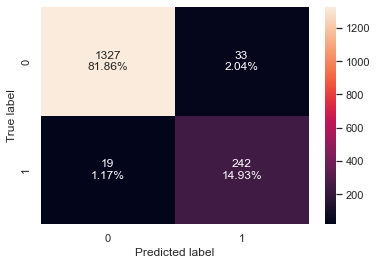

<IPython.core.display.Javascript object>

In [136]:
# Showing the confusion matrix on the GradientBoost model on oversampled dataset
confusion_matrix_sklearn(gbc_over, X_val, y_val)

In [137]:
# Show model performance on the GradientBoost model on oversampled dataset
gbc_over_model_val_perf = model_performance_classification_sklearn(
    gbc_over, X_val, y_val
)
gbc_over_model_val_perf

Accuracy    Recall  Precision        F1
0  0.967921  0.927203       0.88  0.902985

<IPython.core.display.Javascript object>

## XGBoost Model on oversampled data

In [138]:
# Creating the XGBoost Model on oversampled data
xgb_over = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

### Checking XGBoost model performance on oversampled training dataset

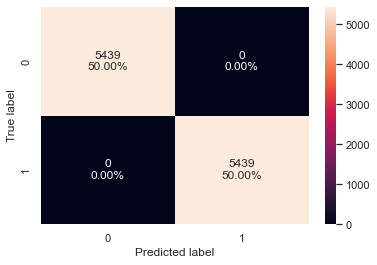

<IPython.core.display.Javascript object>

In [139]:
# Showing the confusion matrix on the XGBoost model on oversampled dataset
confusion_matrix_sklearn(xgb_over, X_train_over, y_train_over)

In [140]:
# Show model performance on the XGBoost model on oversampled dataset
xgb_over_model_train_perf = model_performance_classification_sklearn(
    xgb_over, X_train_over, y_train_over
)
xgb_over_model_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

### Checking XGBoost model performance on oversampled validation dataset

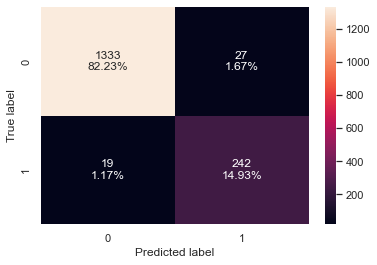

<IPython.core.display.Javascript object>

In [141]:
# Showing the confusion matrix on the XGBoost model on oversampled dataset
confusion_matrix_sklearn(xgb_over, X_val, y_val)

In [142]:
# Show model performance on the XGBoost model on oversampled dataset
xgb_over_model_val_perf = model_performance_classification_sklearn(
    xgb_over, X_val, y_val
)
xgb_over_model_val_perf

Accuracy    Recall  Precision        F1
0  0.971622  0.927203   0.899628  0.913208

<IPython.core.display.Javascript object>

## Comparing all the models (oversamped)

In [143]:
# Training performance comparison

models2_train_comp_df = pd.concat(
    [
        lr_over_model_train_perf.T,
        bagging_over_model_train_perf.T,
        rf_over_model_train_perf.T,
        dtree_over_model_train_perf.T,
        abc_over_model_train_perf.T,
        gbc_over_model_train_perf.T,
        xgb_over_model_train_perf.T,
    ],
    axis=1,
)
models2_train_comp_df.columns = [
    "Logistic Regression oversampled",
    "Bagging Classifier oversampled",
    "Random Forest Classifier oversampled",
    "Decision Tree oversampled",
    "Adaptive Boosting oversampled",
    "Gradient Boosting oversampled",
    "Extreme Gradient Boosting oversampled",
]
print("Training performance comparison:")
models2_train_comp_df

Training performance comparison:


Logistic Regression oversampled  Bagging Classifier oversampled  \
Accuracy                          0.923515                        0.997886   
Recall                            0.913035                        0.996874   
Precision                         0.932582                        0.998895   
F1                                0.922705                        0.997884   

           Random Forest Classifier oversampled  Decision Tree oversampled  \
Accuracy                                    1.0                        1.0   
Recall                                      1.0                        1.0   
Precision                                   1.0                        1.0   
F1                                          1.0                        1.0   

           Adaptive Boosting oversampled  Gradient Boosting oversampled  \
Accuracy                        0.964516                       0.979408   
Recall                          0.968560                       0.980879   
Precision                       0.960788                       0.978002   
F1                              0.964658                       0.979438   

           Extreme Gradient Boosting oversampled  
Accuracy                                     1.0  
Recall                                       1.0  
Precision                                    1.0  
F1                                           1.0

<IPython.core.display.Javascript object>

In [144]:
# Validation performance comparison

models2_val_comp_df = pd.concat(
    [
        lr_over_model_val_perf.T,
        bagging_over_model_val_perf.T,
        rf_over_model_val_perf.T,
        dtree_over_model_val_perf.T,
        abc_over_model_val_perf.T,
        gbc_over_model_val_perf.T,
        xgb_over_model_val_perf.T,
    ],
    axis=1,
)
models2_val_comp_df.columns = [
    "Logistic Regression oversampled",
    "Bagging Classifier oversampled",
    "Random Forest Classifier oversampled",
    "Decision Tree oversampled",
    "Adaptive Boosting oversampled",
    "Gradient Boosting oversampled",
    "Extreme Gradient Boosting oversampled",
]
print("Validation performance comparison:")
models2_val_comp_df

Validation performance comparison:


Logistic Regression oversampled  Bagging Classifier oversampled  \
Accuracy                          0.898211                        0.956817   
Recall                            0.662835                        0.865900   
Precision                         0.692000                        0.865900   
F1                                0.677104                        0.865900   

           Random Forest Classifier oversampled  Decision Tree oversampled  \
Accuracy                               0.956200                   0.919803   
Recall                                 0.850575                   0.819923   
Precision                              0.874016                   0.720539   
F1                                     0.862136                   0.767025   

           Adaptive Boosting oversampled  Gradient Boosting oversampled  \
Accuracy                        0.949414                       0.967921   
Recall                          0.888889                       0.927203   
Precision                       0.814035                       0.880000   
F1                              0.849817                       0.902985   

           Extreme Gradient Boosting oversampled  
Accuracy                                0.971622  
Recall                                  0.927203  
Precision                               0.899628  
F1                                      0.913208

<IPython.core.display.Javascript object>

# Model Building - Undersampled data

In [145]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [146]:
print(
    "Before Undersampling, counts of Attrition_Flag 'Yes': {}".format(sum(y_train == 1))
)
print(
    "Before Undersampling, counts of Attrition_Flag 'No': {} \n".format(
        sum(y_train == 0)
    )
)

print(
    "After Undersampling, counts of Attrition_Flag 'Yes': {}".format(
        sum(y_train_un == 1)
    )
)
print(
    "After Undersampling, counts of Attrition_Flag 'No': {} \n".format(
        sum(y_train_un == 0)
    )
)

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of Attrition_Flag 'Yes': 1041
Before Undersampling, counts of Attrition_Flag 'No': 5439 

After Undersampling, counts of Attrition_Flag 'Yes': 1041
After Undersampling, counts of Attrition_Flag 'No': 1041 

After Undersampling, the shape of train_X: (2082, 29)
After Undersampling, the shape of train_y: (2082,) 



<IPython.core.display.Javascript object>

## Logistic Regression Model on undersampled data

In [147]:
# Fit the logistic regression model on undersampled train set
lr_un = LogisticRegression(solver="newton-cg", random_state=1)
lr_un.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1, solver='newton-cg')

<IPython.core.display.Javascript object>

### Checking Logistic Regression model performance on undersampled training dataset

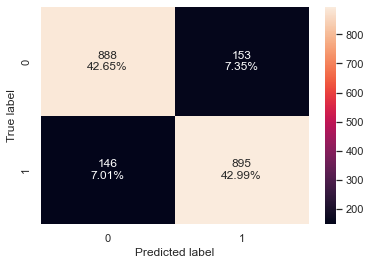

<IPython.core.display.Javascript object>

In [148]:
# Showing the confusion matrix on the Logistic Regression model on undersampled dataset
confusion_matrix_sklearn(lr_un, X_train_un, y_train_un)

In [149]:
# Show model performance on the Logistic Regression model on undersampled dataset
lr_un_model_train_perf = model_performance_classification_sklearn(
    lr_un, X_train_un, y_train_un
)
lr_un_model_train_perf

Accuracy   Recall  Precision        F1
0  0.856388  0.85975   0.854008  0.856869

<IPython.core.display.Javascript object>

### Checking Logistic Regression model performance on undersampled validation dataset

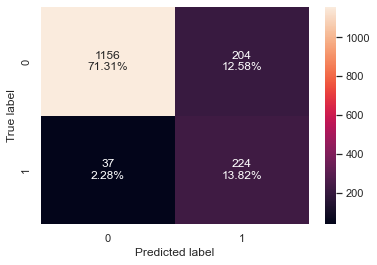

<IPython.core.display.Javascript object>

In [150]:
# Showing the confusion matrix on the Logistic Regression model on undersampled dataset
confusion_matrix_sklearn(lr_un, X_val, y_val)

In [151]:
# Show model performance on the Logistic Regression model on undersampled dataset
lr_un_model_val_perf = model_performance_classification_sklearn(lr_un, X_val, y_val)
lr_un_model_val_perf

Accuracy    Recall  Precision        F1
0  0.851326  0.858238   0.523364  0.650218

<IPython.core.display.Javascript object>

## Bagging Classifier Model on undersampled data

In [152]:
# create the Bagging Classifier model on undersampled data
bagging_un = BaggingClassifier(random_state=1)
bagging_un.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking Bagging Classifier model performance on undersampled training dataset

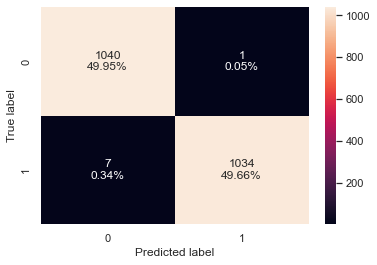

<IPython.core.display.Javascript object>

In [153]:
# Showing the confusion matrix on the Bagging Classifier model on undersampled dataset
confusion_matrix_sklearn(bagging_un, X_train_un, y_train_un)

In [154]:
# Show model performance on the Bagging Classifier model on undersampled dataset
bagging_un_model_train_perf = model_performance_classification_sklearn(
    bagging_un, X_train_un, y_train_un
)
bagging_un_model_train_perf

Accuracy    Recall  Precision        F1
0  0.996158  0.993276   0.999034  0.996146

<IPython.core.display.Javascript object>

### Checking Bagging Classifier model performance on undersampled validation dataset

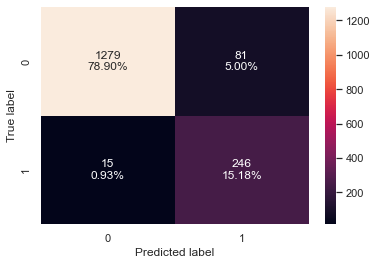

<IPython.core.display.Javascript object>

In [155]:
# Showing the confusion matrix on the Bagging Classifier model on undersampled dataset
confusion_matrix_sklearn(bagging_un, X_val, y_val)

In [156]:
# Show model performance on the Bagging Classifier model on undersampled dataset
bagging_un_model_val_perf = model_performance_classification_sklearn(
    bagging_un, X_val, y_val
)
bagging_un_model_val_perf

Accuracy    Recall  Precision        F1
0  0.940777  0.942529   0.752294  0.836735

<IPython.core.display.Javascript object>

## Random Forest Model on undersampled data

In [157]:
# create the Random Forest model on undersampled data
rf_un = RandomForestClassifier(random_state=1)
rf_un.fit(X_train_un, y_train_un)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking Random Forest model performance on undersampled training dataset

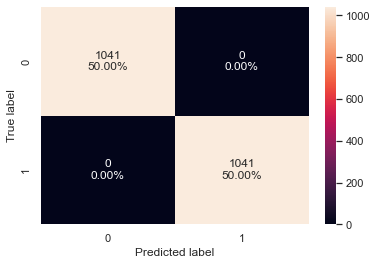

<IPython.core.display.Javascript object>

In [158]:
# Showing the confusion matrix on the Random Forest model on undersampled dataset
confusion_matrix_sklearn(rf_un, X_train_un, y_train_un)

In [159]:
# Show model performance on the Random Forest model on undersampled dataset
rf_un_model_train_perf = model_performance_classification_sklearn(
    rf_un, X_train_un, y_train_un
)
rf_un_model_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

### Checking Random Forest model performance on undersampled validation dataset

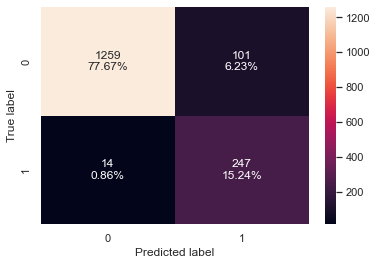

<IPython.core.display.Javascript object>

In [160]:
# Showing the confusion matrix on the Random Forest model on undersampled dataset
confusion_matrix_sklearn(rf_un, X_val, y_val)

In [161]:
# Show model performance on the Random Forest model on undersampled dataset
rf_un_model_val_perf = model_performance_classification_sklearn(rf_un, X_val, y_val)
rf_un_model_val_perf

Accuracy   Recall  Precision        F1
0  0.929056  0.94636    0.70977  0.811166

<IPython.core.display.Javascript object>

## Decision Tree Model on undersampled data

In [162]:
# Creating the Decision Tree Model on undersampled data
dtree_un = DecisionTreeClassifier(criterion="gini", random_state=1)
dtree_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking Decision Tree model performance on undersampled training dataset

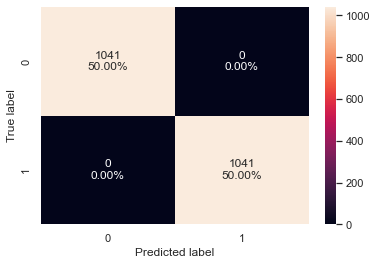

<IPython.core.display.Javascript object>

In [163]:
# Showing the confusion matrix on the Decision Tree model on undersampled dataset
confusion_matrix_sklearn(dtree_un, X_train_un, y_train_un)

In [164]:
# Show model performance on the Decision Tree model on undersampled dataset
dtree_un_model_train_perf = model_performance_classification_sklearn(
    dtree_un, X_train_un, y_train_un
)
dtree_un_model_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

### Checking Decision Tree model performance on undersampled validation dataset

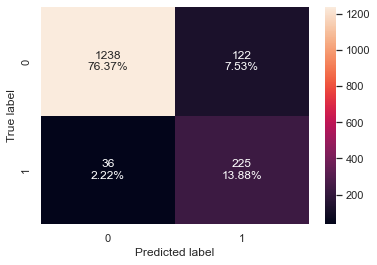

<IPython.core.display.Javascript object>

In [165]:
# Showing the confusion matrix on the Decision Tree model on undersampled dataset
confusion_matrix_sklearn(dtree_un, X_val, y_val)

In [166]:
# Show model performance on the Decision Tree model on undersampled dataset
dtree_un_model_val_perf = model_performance_classification_sklearn(
    dtree_un, X_val, y_val
)
dtree_un_model_val_perf

Accuracy    Recall  Precision        F1
0  0.902529  0.862069   0.648415  0.740132

<IPython.core.display.Javascript object>

## AdaBoost Model on undersampled data

In [167]:
# Creating the AdaBoost Model on undersampled data
abc_un = AdaBoostClassifier(random_state=1)
abc_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking AdaBoost model performance on undersampled training dataset

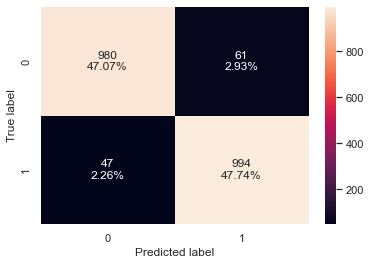

<IPython.core.display.Javascript object>

In [168]:
# Showing the confusion matrix on the AdaBoost model on undersampled dataset
confusion_matrix_sklearn(abc_un, X_train_un, y_train_un)

In [169]:
# Show model performance on the AdaBoost model on undersampled dataset
abc_un_model_train_perf = model_performance_classification_sklearn(
    abc_un, X_train_un, y_train_un
)
abc_un_model_train_perf

Accuracy    Recall  Precision        F1
0  0.948127  0.954851    0.94218  0.948473

<IPython.core.display.Javascript object>

### Checking AdaBoost model performance on undersampled validation dataset

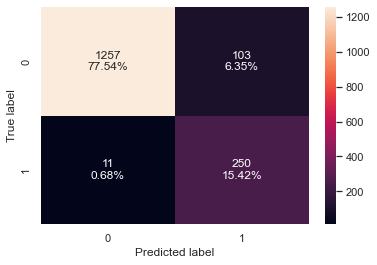

<IPython.core.display.Javascript object>

In [170]:
# Showing the confusion matrix on the AdaBoost model on undersampled dataset
confusion_matrix_sklearn(abc_un, X_val, y_val)

In [171]:
# Show model performance on the AdaBoost model on undersampled dataset
abc_un_model_val_perf = model_performance_classification_sklearn(abc_un, X_val, y_val)
abc_un_model_val_perf

Accuracy    Recall  Precision        F1
0  0.929673  0.957854   0.708215  0.814332

<IPython.core.display.Javascript object>

## GradientBoost Model on undersampled data

In [172]:
# Creating the GradientBoost Model on undersampled data
gbc_un = GradientBoostingClassifier(random_state=1)
gbc_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking GradientBoost model performance on undersampled training dataset

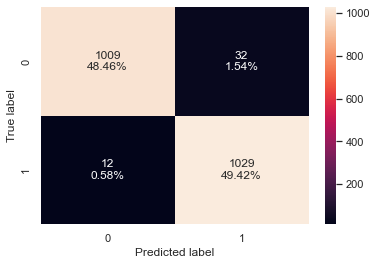

<IPython.core.display.Javascript object>

In [173]:
# Showing the confusion matrix on the GradientBoost model on undersampled dataset
confusion_matrix_sklearn(gbc_un, X_train_un, y_train_un)

In [174]:
# Show model performance on the GradientBoost model on undersampled dataset
gbc_un_model_train_perf = model_performance_classification_sklearn(
    gbc_un, X_train_un, y_train_un
)
gbc_un_model_train_perf

Accuracy    Recall  Precision        F1
0  0.978866  0.988473    0.96984  0.979068

<IPython.core.display.Javascript object>

### Checking GradientBoost model performance on undersampled validation dataset

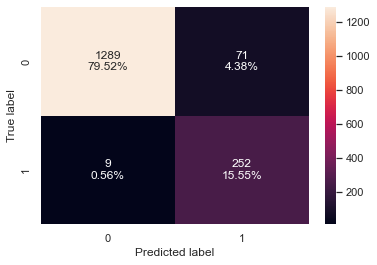

<IPython.core.display.Javascript object>

In [175]:
# Showing the confusion matrix on the GradientBoost model on undersampled dataset
confusion_matrix_sklearn(gbc_un, X_val, y_val)

In [176]:
# Show model performance on the GradientBoost model on undersampled dataset
gbc_un_model_val_perf = model_performance_classification_sklearn(gbc_un, X_val, y_val)
gbc_un_model_val_perf

Accuracy    Recall  Precision        F1
0  0.950648  0.965517   0.780186  0.863014

<IPython.core.display.Javascript object>

## XGBoost Model on undersampled data

In [177]:
# Creating the XGBoost Model on undersampled data
xgb_un = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

### Checking XGBoost model performance on undersampled training dataset

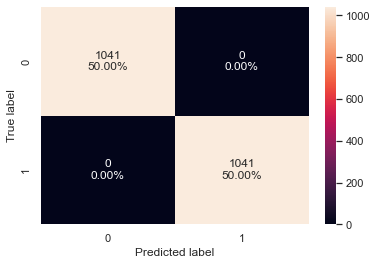

<IPython.core.display.Javascript object>

In [178]:
# Showing the confusion matrix on the XGBoost model on undersampled dataset
confusion_matrix_sklearn(xgb_un, X_train_un, y_train_un)

In [179]:
# Show model performance on the XGBoost model on undersampled dataset
xgb_un_model_train_perf = model_performance_classification_sklearn(
    xgb_un, X_train_un, y_train_un
)
xgb_un_model_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

### Checking XGBoost model performance on undersampled validation dataset

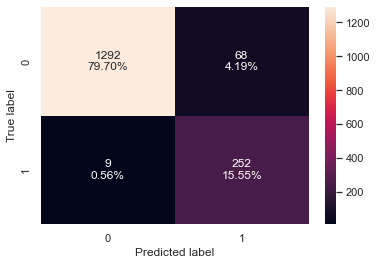

<IPython.core.display.Javascript object>

In [180]:
# Showing the confusion matrix on the XGBoost model on undersampled dataset
confusion_matrix_sklearn(xgb_un, X_val, y_val)

In [181]:
# Show model performance on the XGBoost model on undersampled dataset
xgb_un_model_val_perf = model_performance_classification_sklearn(xgb_un, X_val, y_val)
xgb_un_model_val_perf

Accuracy    Recall  Precision       F1
0  0.952498  0.965517     0.7875  0.86747

<IPython.core.display.Javascript object>

## Comparing all the models (undersamped)

In [182]:
# Training performance comparison

models3_train_comp_df = pd.concat(
    [
        lr_un_model_train_perf.T,
        bagging_un_model_train_perf.T,
        rf_un_model_train_perf.T,
        dtree_un_model_train_perf.T,
        abc_un_model_train_perf.T,
        gbc_un_model_train_perf.T,
        xgb_un_model_train_perf.T,
    ],
    axis=1,
)
models3_train_comp_df.columns = [
    "Logistic Regression undersampled",
    "Bagging Classifier undersampled",
    "Random Forest Classifier undersampled",
    "Decision Tree undersampled",
    "Adaptive Boosting undersampled",
    "Gradient Boosting undersampled",
    "Extreme Gradient Boosting undersampled",
]
print("Training performance comparison:")
models3_train_comp_df

Training performance comparison:


Logistic Regression undersampled  Bagging Classifier undersampled  \
Accuracy                           0.856388                         0.996158   
Recall                             0.859750                         0.993276   
Precision                          0.854008                         0.999034   
F1                                 0.856869                         0.996146   

           Random Forest Classifier undersampled  Decision Tree undersampled  \
Accuracy                                     1.0                         1.0   
Recall                                       1.0                         1.0   
Precision                                    1.0                         1.0   
F1                                           1.0                         1.0   

           Adaptive Boosting undersampled  Gradient Boosting undersampled  \
Accuracy                         0.948127                        0.978866   
Recall                           0.954851                        0.988473   
Precision                        0.942180                        0.969840   
F1                               0.948473                        0.979068   

           Extreme Gradient Boosting undersampled  
Accuracy                                      1.0  
Recall                                        1.0  
Precision                                     1.0  
F1                                            1.0

<IPython.core.display.Javascript object>

In [183]:
# Validation performance comparison

models3_val_comp_df = pd.concat(
    [
        lr_un_model_val_perf.T,
        bagging_un_model_val_perf.T,
        rf_un_model_val_perf.T,
        dtree_un_model_val_perf.T,
        abc_un_model_val_perf.T,
        gbc_un_model_val_perf.T,
        xgb_un_model_val_perf.T,
    ],
    axis=1,
)
models3_val_comp_df.columns = [
    "Logistic Regression undersampled",
    "Bagging Classifier undersampled",
    "Random Forest Classifier undersampled",
    "Decision Tree undersampled",
    "Adaptive Boosting undersampled",
    "Gradient Boosting undersampled",
    "Extreme Gradient Boosting undersampled",
]
print("Validation performance comparison:")
models3_val_comp_df

Validation performance comparison:


Logistic Regression undersampled  Bagging Classifier undersampled  \
Accuracy                           0.851326                         0.940777   
Recall                             0.858238                         0.942529   
Precision                          0.523364                         0.752294   
F1                                 0.650218                         0.836735   

           Random Forest Classifier undersampled  Decision Tree undersampled  \
Accuracy                                0.929056                    0.902529   
Recall                                  0.946360                    0.862069   
Precision                               0.709770                    0.648415   
F1                                      0.811166                    0.740132   

           Adaptive Boosting undersampled  Gradient Boosting undersampled  \
Accuracy                         0.929673                        0.950648   
Recall                           0.957854                        0.965517   
Precision                        0.708215                        0.780186   
F1                               0.814332                        0.863014   

           Extreme Gradient Boosting undersampled  
Accuracy                                 0.952498  
Recall                                   0.965517  
Precision                                0.787500  
F1                                       0.867470

<IPython.core.display.Javascript object>

# Hyperparameter tuning using random search

- The three best models we are going to use Hyperparameter tuning are Adaptive Boosting(undersampled), Gradient Boosting(undersampled) and Extreme Gradient Boosting(undersampled) and see if we can get models to preform better.
- The reason for Hyperparameter tuning the three selected models because they have the best Recall score of all 21 models.
- Recall is our greatest measure of success on the models because it is more costly for the credit card company (Thera bank) to predicted that the customers is an active existing card user and be wrong that the customers is actual Attrited card user and not using their credit card.
- False Positives are just False Alarms.

## Hyperparameter tuning AdaBoost Model

In [184]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(
    abc_tuned,
    parameters,
    n_iter=30,
    scoring=acc_scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train_un, y_train_un)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.9, n_estimators=60, random_state=1)

<IPython.core.display.Javascript object>

### Checking AdaBoost tuned model performance on training dataset

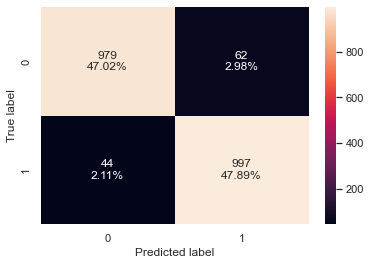

<IPython.core.display.Javascript object>

In [185]:
# Showing the confusion matrix on the AdaBoost tuned model
confusion_matrix_sklearn(abc_tuned, X_train_un, y_train_un)

In [186]:
# Show model performance on the AdaBoost tuned model
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train_un, y_train_un
)
abc_tuned_model_train_perf

Accuracy    Recall  Precision        F1
0  0.949087  0.957733   0.941454  0.949524

<IPython.core.display.Javascript object>

### Checking AdaBoost tuned model performance on validation dataset

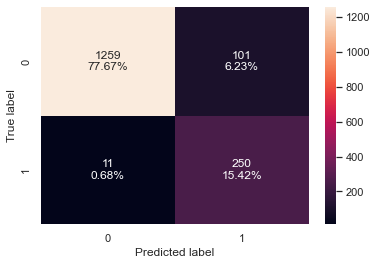

<IPython.core.display.Javascript object>

In [187]:
# Showing the confusion matrix on the AdaBoost tuned model
confusion_matrix_sklearn(abc_tuned, X_val, y_val)

In [188]:
# Show model performance on the AdaBoost tuned model
abc_tuned_model_val_perf = model_performance_classification_sklearn(
    abc_tuned, X_val, y_val
)
abc_tuned_model_val_perf

Accuracy    Recall  Precision        F1
0  0.930907  0.957854   0.712251  0.816993

<IPython.core.display.Javascript object>

## Hyperparameter tuning GradientBoost Model

In [189]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(
    gbc_tuned,
    parameters,
    n_iter=30,
    scoring=acc_scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train_un, y_train_un)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

<IPython.core.display.Javascript object>

### Checking GradientBoost tuned model performance on training dataset

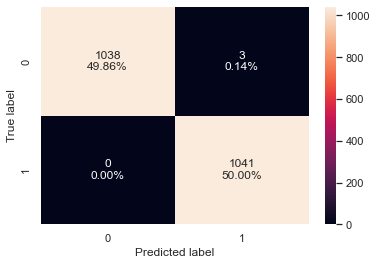

<IPython.core.display.Javascript object>

In [190]:
# Showing the confusion matrix on the GradientBoost tuned model
confusion_matrix_sklearn(gbc_tuned, X_train_un, y_train_un)

In [191]:
# Show model performance on the GradientBoost tuned model
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train_un, y_train_un
)
gbc_tuned_model_train_perf

Accuracy  Recall  Precision        F1
0  0.998559     1.0   0.997126  0.998561

<IPython.core.display.Javascript object>

### Checking GradientBoost tuned model performance on validation dataset

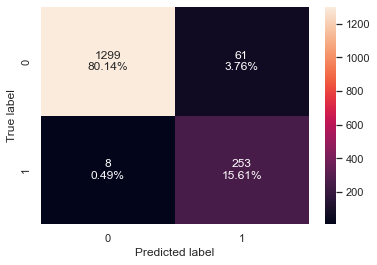

<IPython.core.display.Javascript object>

In [192]:
# Showing the confusion matrix on the GradientBoost tuned model
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)

In [193]:
# Show model performance on the GradientBoost tuned model
gbc_tuned_model_val_perf = model_performance_classification_sklearn(
    gbc_tuned, X_val, y_val
)
gbc_tuned_model_val_perf

Accuracy    Recall  Precision    F1
0  0.957434  0.969349   0.805732  0.88

<IPython.core.display.Javascript object>

## Hyperparameter tuning XGBoost Model

In [194]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10, 100, 20),
    "scale_pos_weight": [0, 1, 2, 5],
    "subsample": [0.5, 0.7, 0.9, 1],
    "learning_rate": [0.01, 0.1, 0.2, 0.05],
    "gamma": [0, 1, 3],
    "colsample_bytree": [0.5, 0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(
    xgb_tuned,
    parameters,
    n_iter=30,
    scoring=acc_scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_un, y_train_un)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

### Checking XGBoost tuned model performance on training dataset

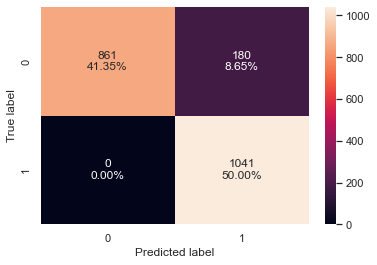

<IPython.core.display.Javascript object>

In [195]:
# Showing the confusion matrix on the XGBoost tuned model
confusion_matrix_sklearn(xgb_tuned, X_train_un, y_train_un)

In [196]:
# Show model performance on the XGBoost tuned model
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train_un, y_train_un
)
xgb_tuned_model_train_perf

Accuracy  Recall  Precision        F1
0  0.913545     1.0    0.85258  0.920424

<IPython.core.display.Javascript object>

### Checking XGBoost tuned model performance on validation dataset

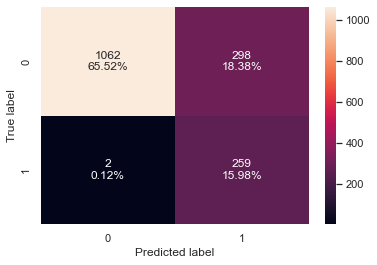

<IPython.core.display.Javascript object>

In [197]:
# Showing the confusion matrix on the XGBoost tuned model
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

In [198]:
# Show model performance on the XGBoost tuned model
xgb_tuned_model_val_perf = model_performance_classification_sklearn(
    xgb_tuned, X_val, y_val
)
xgb_tuned_model_val_perf

Accuracy    Recall  Precision        F1
0  0.814929  0.992337   0.464991  0.633252

<IPython.core.display.Javascript object>

# Comparing all the models (tuned)

In [199]:
# Training performance comparison

models4_train_comp_df = pd.concat(
    [
        abc_tuned_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
    ],
    axis=1,
)
models4_train_comp_df.columns = [
    "Adaptive Boosting tuned",
    "Gradient Boosting tuned",
    "Extreme Gradient Boosting tuned",
]
print("Training performance comparison:")
models4_train_comp_df

Training performance comparison:


Adaptive Boosting tuned  Gradient Boosting tuned  \
Accuracy                  0.949087                 0.998559   
Recall                    0.957733                 1.000000   
Precision                 0.941454                 0.997126   
F1                        0.949524                 0.998561   

           Extreme Gradient Boosting tuned  
Accuracy                          0.913545  
Recall                            1.000000  
Precision                         0.852580  
F1                                0.920424

<IPython.core.display.Javascript object>

In [200]:
# Validation performance comparison

models4_val_comp_df = pd.concat(
    [
        abc_tuned_model_val_perf.T,
        gbc_tuned_model_val_perf.T,
        xgb_tuned_model_val_perf.T,
    ],
    axis=1,
)
models4_val_comp_df.columns = [
    "Adaptive Boosting tuned",
    "Gradient Boosting tuned",
    "Extreme Gradient Boosting tuned",
]
print("Validation performance comparison:")
models4_val_comp_df

Validation performance comparison:


Adaptive Boosting tuned  Gradient Boosting tuned  \
Accuracy                  0.930907                 0.957434   
Recall                    0.957854                 0.969349   
Precision                 0.712251                 0.805732   
F1                        0.816993                 0.880000   

           Extreme Gradient Boosting tuned  
Accuracy                          0.814929  
Recall                            0.992337  
Precision                         0.464991  
F1                                0.633252

<IPython.core.display.Javascript object>

- **After comparing all the tuned models the best model is the Extreme Gradient Boosting tuned model.**
- **Extreme Gradient Boosting tuned has a great Recall score and okay Accuracy overall.**
- **Recall is our greatest measure of success on the models because it is more costly for the credit card company (Thera bank) to predicted that the customers is an active existing card user and be wrong that the customers is actually a Attrited card user and not using their credit card.**
- **False Positive are just False Alarms and not costly to the bank.**

# Productionize the model using pipelines

In [201]:
# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# numerical transformer using a column transformer
preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numerical_features),],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

<IPython.core.display.Javascript object>

In [202]:
# pipeline takes a list of tuples as parameter. The last entry is the call to the modeling algorithm
pipeline = Pipeline(
    steps=[("pre", preprocessor), ("scaler", StandardScaler()), ("xgb", xgb_tuned)]
)

# "scaler" is the name assigned to StandardScaler
# "xgb" is the name assigned to XGBoost tuned Model

<IPython.core.display.Javascript object>

In [203]:
# now the pipeline object can be used as a normal classifier
pipeline.fit(X_train_un, y_train_un)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_...
                               enable_categorical=False, eval_metric='logloss',
                               gamma=3, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.05, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=50, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=1, reg_alpha=0,
                               reg_lambda=1, ...))])

<IPython.core.display.Javascript object>

# Pipeline performance on test dataset

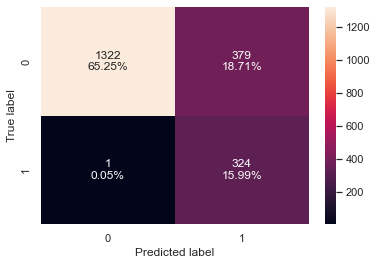

<IPython.core.display.Javascript object>

In [204]:
# Showing the confusion matrix on the XGBoost tuned model
confusion_matrix_sklearn(pipeline, X_test, y_test)

In [205]:
# Show model performance on the pipeline model
pipeline_model_val_perf = model_performance_classification_sklearn(
    pipeline, X_test, y_test
)
pipeline_model_val_perf

Accuracy    Recall  Precision       F1
0  0.812438  0.996923   0.460882  0.63035

<IPython.core.display.Javascript object>

- **Final Recall on test dataset is 99.7% with an Accuracy of 81.2% overall.**
- Model can find almost all the Attrited customers so the bank can target the customers

# Business recommendations and insights

- Use the XGBoost tuned model to flag all possible Attrited customers for the Bank.
- Try to get Blue card customers to upgrade their credit cards as Blue card customers are more likely to be Attrited customers.
- Try to attract more customers earning more than 40K as less than 40K customers are more likely to be Attrited customers.
- Offer an initial bonus opportunity when getting a new credit card with Thera Bank.
- Offer competitive cash-back bonus on all purchases as customers are more likely to use cards that give them cash back.
- Let customers know that paying with a credit card makes it easier to avoid losses from fraud.
- When customers stop using their credit card try to offer special promotion offers to the customer to get them to use credit card again.
- Credit cards can be a helpful way to build or rebuild the customers credit history.
- Unlike debit cards, which are linked to a bank account, credit cards are essentially a way to borrow money in the short term, which you then repay.
- Have good customer service as customers are more likely to continue using credit card with excellent customer service.
- Have where customers can customize their cash back rewards.
- Offer easy way to pay the credit card statements such as credit card banking app.